In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

bg_color = (0.25, 0.25, 0.25)
sns.set(rc={"font.style":"normal",
            "axes.facecolor":bg_color,
            "figure.facecolor":bg_color,
            "text.color":"black",
            "xtick.color":"black",
            "ytick.color":"black",
            "axes.labelcolor":"black",
            "axes.grid":False,
            'axes.labelsize':30,
            'figure.figsize':(20.0, 10.0),
            'xtick.labelsize':25,
            'ytick.labelsize':20})

In [2]:
loan_data = pd.read_csv("//home//jayanth//Desktop//loan.csv",low_memory=False)


In [3]:
print(loan_data.head())

          id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501.0    1296599       5000         5000           4975.0   36 months   
1  1077430.0    1314167       2500         2500           2500.0   60 months   
2  1077175.0    1313524       2400         2400           2400.0   36 months   
3  1076863.0    1277178      10000        10000          10000.0   36 months   
4  1075358.0    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade            ...              \
0   10.65%       162.87     B        B2            ...               
1   15.27%        59.83     C        C4            ...               
2   15.96%        84.33     C        C5            ...               
3   13.49%       339.31     C        C1            ...               
4   12.69%        67.79     B        B5            ...               

  num_tl_90g_dpd_24m num_tl_op_past_12m pct_tl_nvr_dlq  percent_bc_gt_75  \
0                NaN  

In [4]:
l1 = loan_data['loan_status']

In [5]:
l1.head()


0     Fully Paid
1    Charged Off
2     Fully Paid
3     Fully Paid
4        Current
Name: loan_status, dtype: object

In [6]:
df = loan_data[loan_data.loan_status != "Current"]

In [7]:
l1 = df['loan_status']

In [8]:
l1.head()

0     Fully Paid
1    Charged Off
2     Fully Paid
3     Fully Paid
5     Fully Paid
Name: loan_status, dtype: object

In [9]:
df1 = df.drop(df.std()[(df.std() == 0)].index, axis=1)

In [10]:
df1.head()


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501.0,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
1,1077430.0,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
2,1077175.0,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
3,1076863.0,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
5,1075269.0,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN


In [11]:
rows, columns = df.shape
print(rows)
print(columns)

38577
111


In [12]:
rows, columns = df1.shape
print(rows)
print(columns)

38577
103


In [13]:
#we have filtered columns with same value . Total number of columns after filtering is 103

In [14]:
#we are going to drop columns url desc title

In [15]:
df1.drop(['url','desc','member_id'],axis=1,inplace=True)

In [16]:
df1['emp_title'] = df1.emp_title.astype(str)
df1['title'] = df1.title.astype(str)
df1.emp_title = df1.emp_title.apply(lambda x: x.lower())
df1.title = df1.title.apply(lambda x: x.lower())
import string
df1.emp_title = df1.emp_title.apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))
df1['emp_title'] = df1['emp_title'].str.replace('usairforce','usaf')
df1['emp_title'] = df1['emp_title'].str.replace('usarmy','army')
df1['emp_title'] = df1['emp_title'].str.replace('usnavy','navy')
df1['emp_title'] = df1['emp_title'].str.replace('uspostalservice','usps')
df1['emp_title'] = df1['emp_title'].str.replace('unitedparcelservice','ups')
df1['emp_title'] = df1['emp_title'].str.replace('verizonwireless','verizon')
df1['emp_title'] = df1['emp_title'].str.replace('selfemployed','self')
df1['emp_title'] = df1['emp_title'].str.replace('thehomedepot','homedepot')
df1['title'] = df1['title'].str.replace('consolidation','debt consalidation')
df1['title'] = df1['title'].str.replace('debt consalidation loan','debt consalidation')
df1['title'] = df1['title'].str.replace('consolidate me 2011','debt consalidation')
df1['title'] = df1['title'].str.replace('debt debt consalidation','debt consalidation')
te = df1['emp_title']
te.head(50)

0                                         nan
1                                       ryder
2                                         nan
3                         air resources board
5                        veolia transportaton
6                   southern star photography
7                             mkc accounting 
8                                         nan
9                                   starbucks
10                      southwest rural metro
11                                       ucla
12          va dept of conservationrecreation
13                                     target
14                                      sfmta
15                   internal revenue service
16                           chins restaurant
17                                   duracell
18                      connection inspection
19               network interpreting service
20           archdiocese of galveston houston
21                             osram sylvania
22                                

In [17]:
#Data Filling. Missing value imputation

In [18]:
df_length = len(df1)
value = (75*df_length)/100.00
print(df_length)
print(value)

38577
28932.75


In [19]:
df_c1 = df1.dropna(thresh=value,axis=1)
df_c1.shape
df_c1.head(1)

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,application_type,pub_rec_bankruptcies
0,1077501.0,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,nan,...,5000.0,863.16,0.0,0.0,0.0,Jan-15,171.62,May-16,INDIVIDUAL,0.0


In [20]:
df_c1["loan_status"].value_counts()

Fully Paid     32950
Charged Off     5627
Name: loan_status, dtype: int64

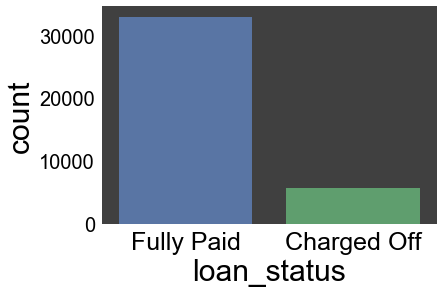

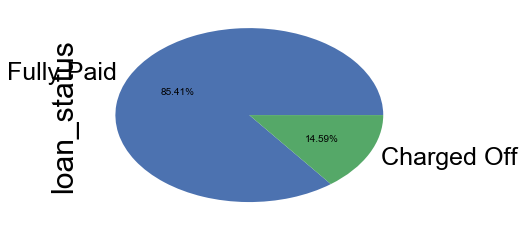

In [21]:
sns.countplot(x='loan_status',data=df_c1)
plt.show()
df_c1.loan_status.value_counts().plot(x=None,y=None, kind='pie',autopct='%1.2f%%')
plt.show()

In [22]:
title = df_c1[['title','loan_status']]
title['title'] = title.title.astype(str)
title.title = title.title.apply(lambda x: x.lower())

title.head()

,title,loan_status
0,computer,Fully Paid
1,bike,Charged Off
2,real estate business,Fully Paid
3,personel,Fully Paid
5,my wedding loan i promise to pay back,Fully Paid


In [23]:
title_c = title[title.loan_status == "Charged Off"]
f = title_c["title"].value_counts()
f.head(10)

debt consalidation                934
personal loan                     145
personal                          104
small business loan               102
home improvement                   80
credit card debt consalidation     54
loan                               45
credit card loan                   42
other loan                         38
my loan                            33
Name: title, dtype: int64

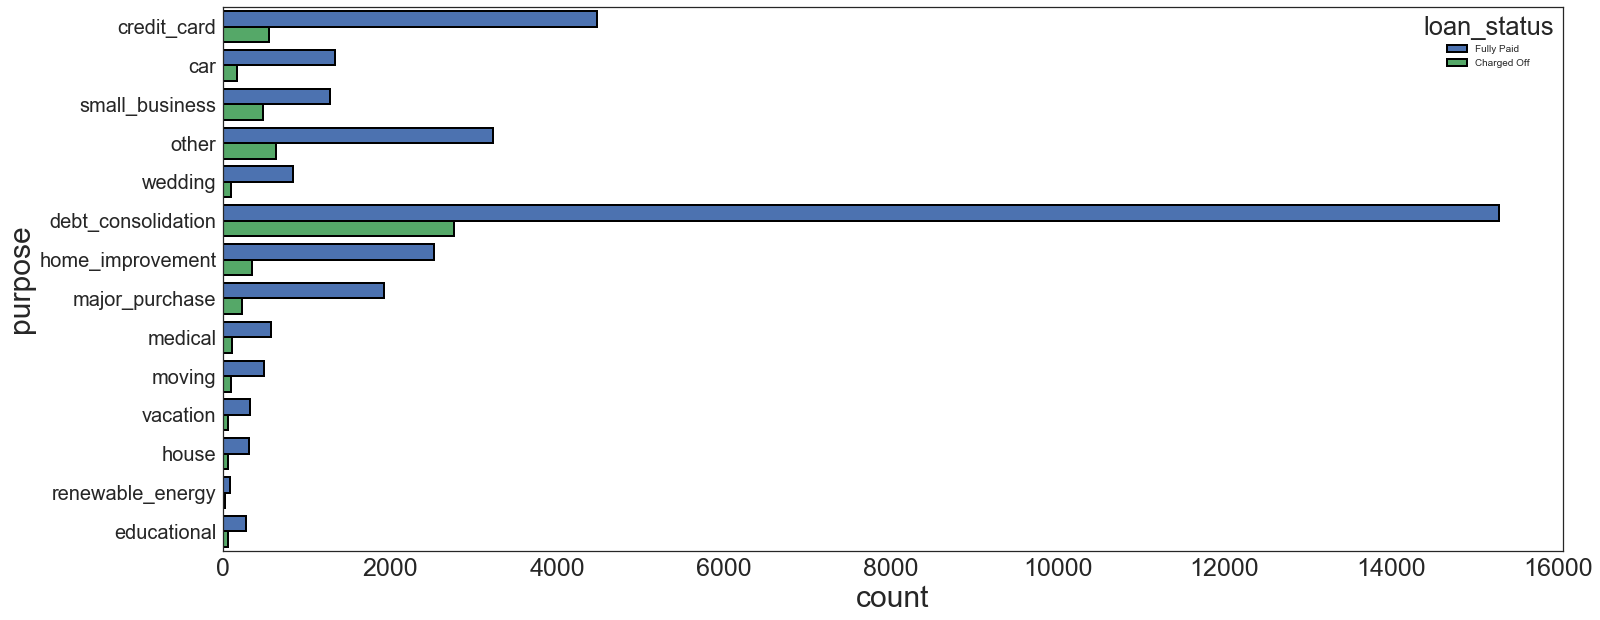

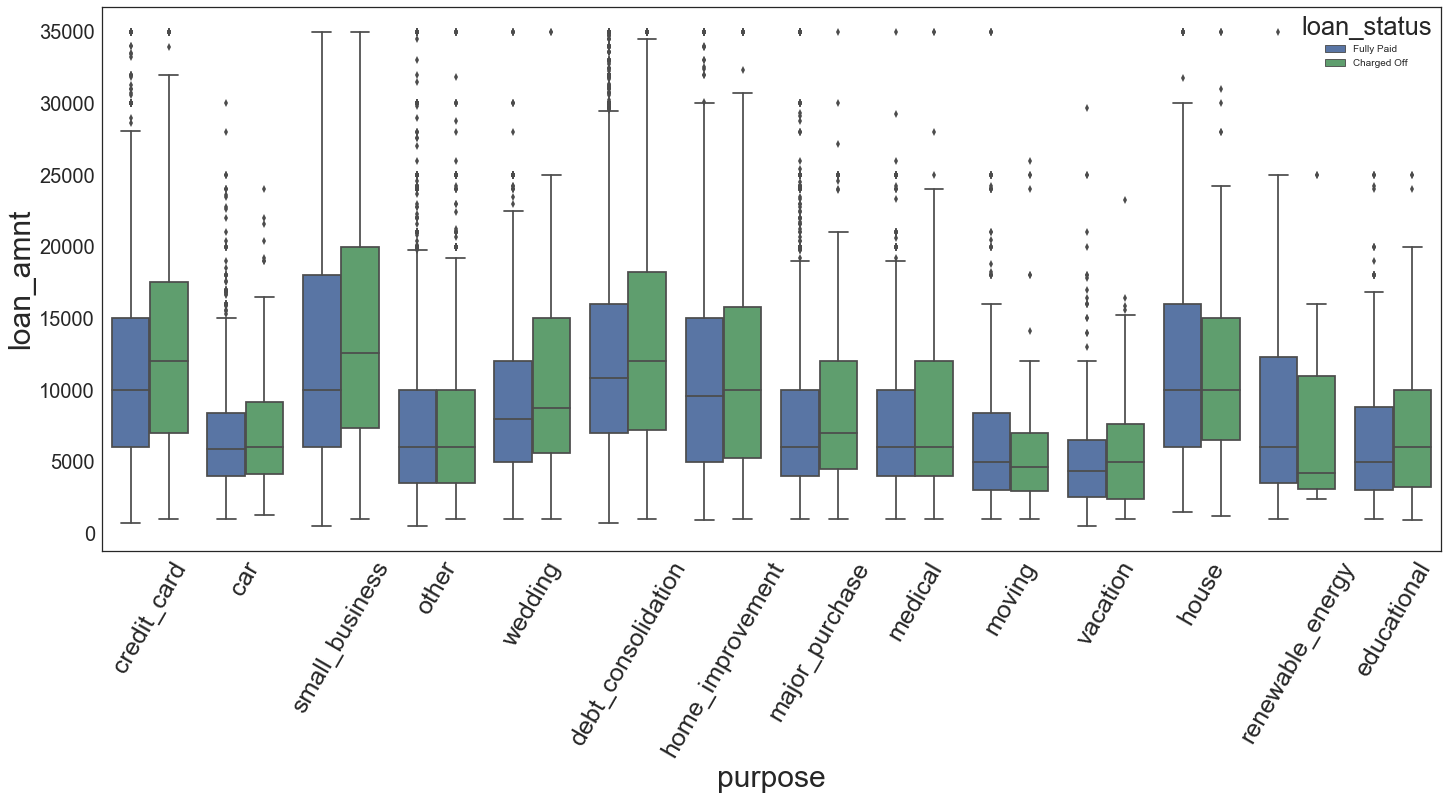

In [24]:
purpose = df_c1[['purpose','loan_amnt','loan_status']]
import numpy as np
sns.set_style("white")
sns.set_context({"figure.figsize": (24, 10)})
num_categories = purpose.purpose.unique().size
sns.countplot(y="purpose", hue="loan_status", saturation=1,edgecolor=(0,0,0),linewidth=2,data=purpose)
plt.show()

ax=sns.boxplot(y='loan_amnt',x='purpose',hue='loan_status',data=purpose)
ax.set_xticklabels(ax.get_xticklabels(),rotation=60)
plt.show()
# Tweak the 

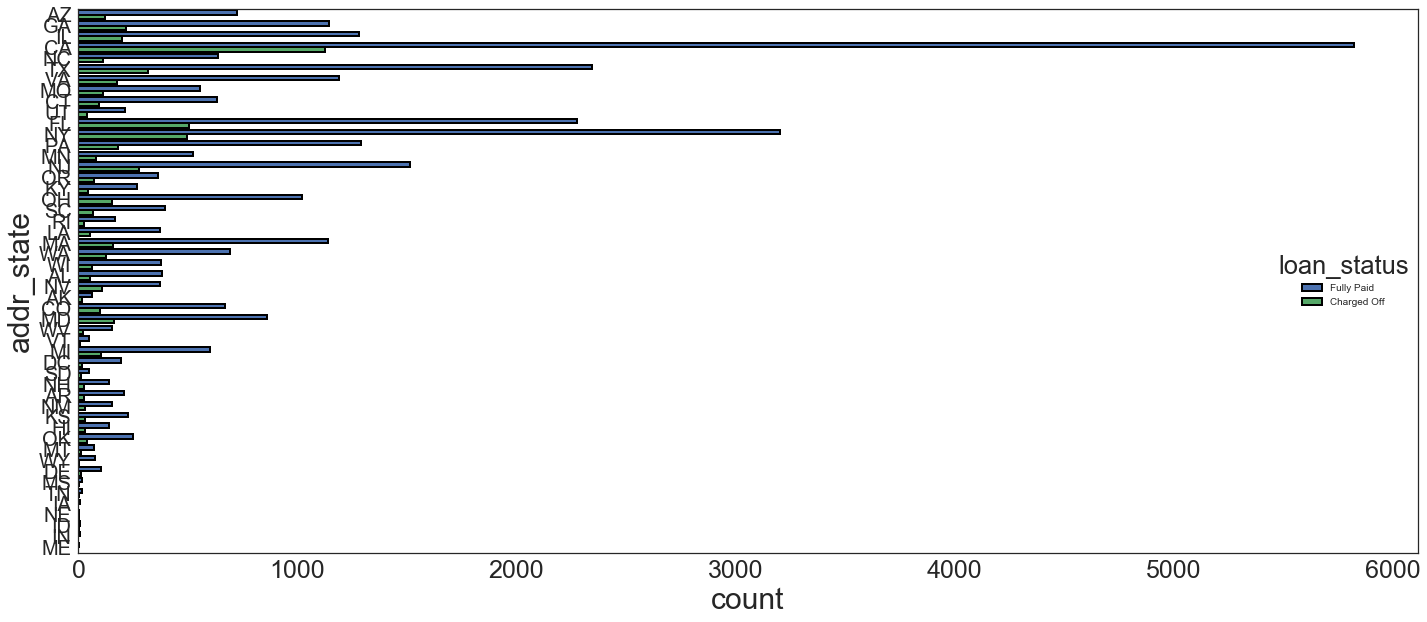

CA    1125
FL     504
NY     495
TX     316
NJ     278
GA     215
IL     197
PA     180
VA     177
MD     162
Name: addr_state, dtype: int64

In [25]:
Add = df_c1[['addr_state','loan_amnt','loan_status']]
sns.set_style("white")
sns.set_context({"figure.figsize": (24, 10)})
num_categories = Add.addr_state.unique().size
sns.countplot(y="addr_state", hue="loan_status", saturation=1,edgecolor=(0,0,0),linewidth=2,data=Add)
plt.show()
Add_c = Add[Add.loan_status == "Charged Off"]
f = Add_c["addr_state"].value_counts()
f.head(10)

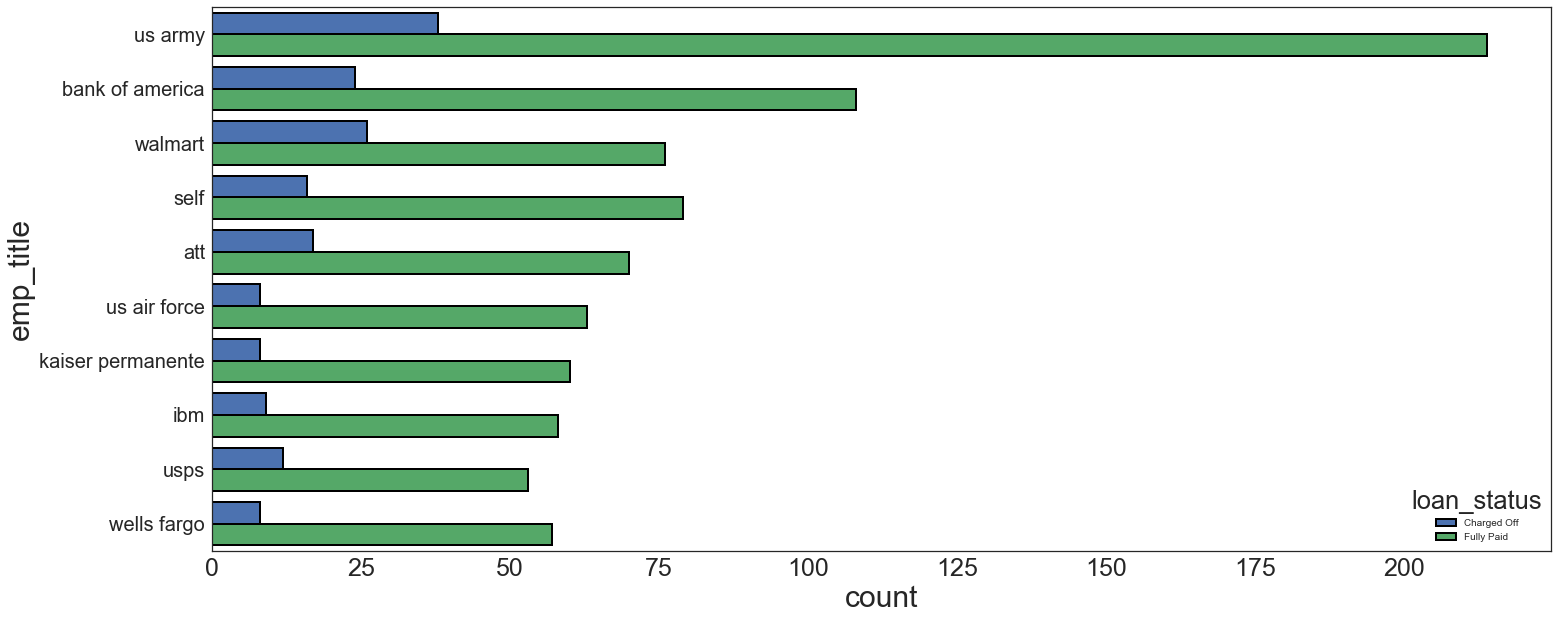

In [26]:
Emp = df_c1[['emp_title','loan_amnt','loan_status']]
Emp = Emp[Emp.emp_title != 'nan']
sns.set_style("white")
sns.set_context({"figure.figsize": (24, 10)})
sns.countplot(y="emp_title", hue="loan_status", saturation=1,edgecolor=(0,0,0),linewidth=2,data=Emp,order=Emp.emp_title.value_counts().iloc[:10].index)
plt.show()


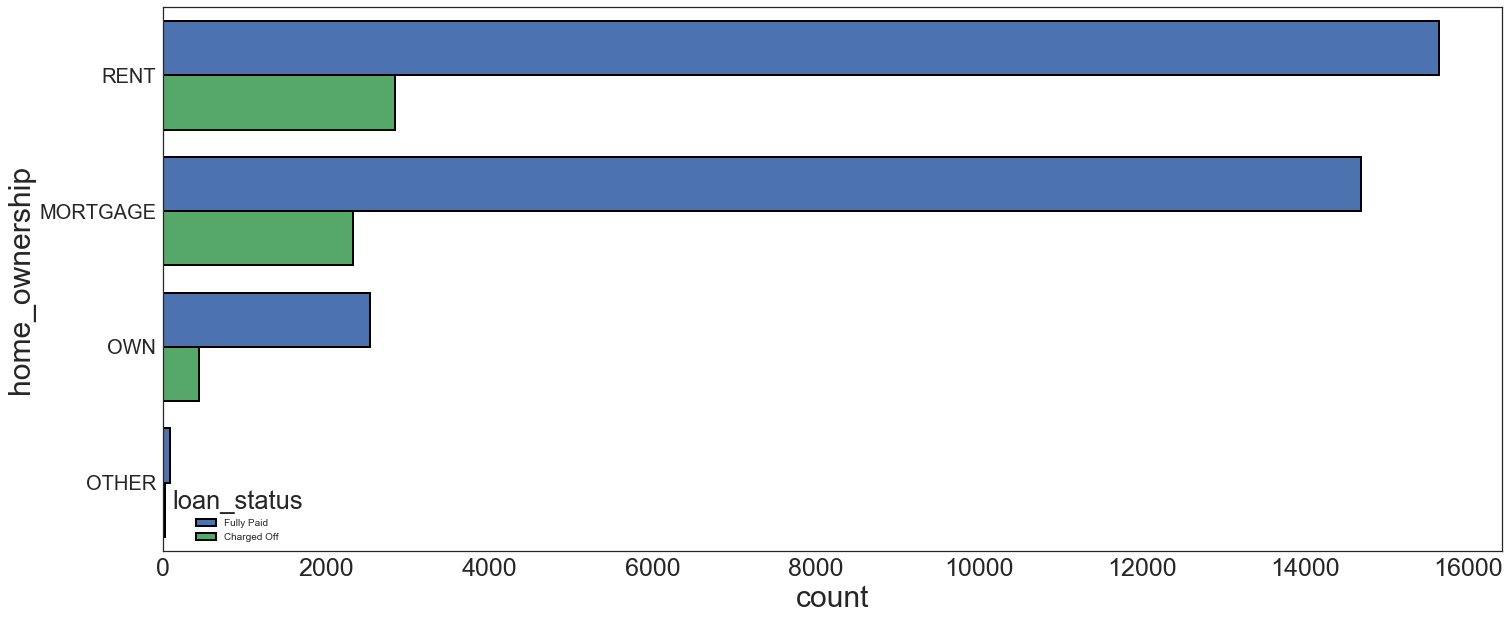

In [27]:
owner = df_c1[['home_ownership','loan_status']]
sns.set_style("white")
sns.set_context({"figure.figsize": (24, 10)})
sns.countplot(y="home_ownership", hue="loan_status", saturation=1,edgecolor=(0,0,0),linewidth=2,data=owner,order=owner.home_ownership.value_counts().iloc[:4].index)
plt.show()

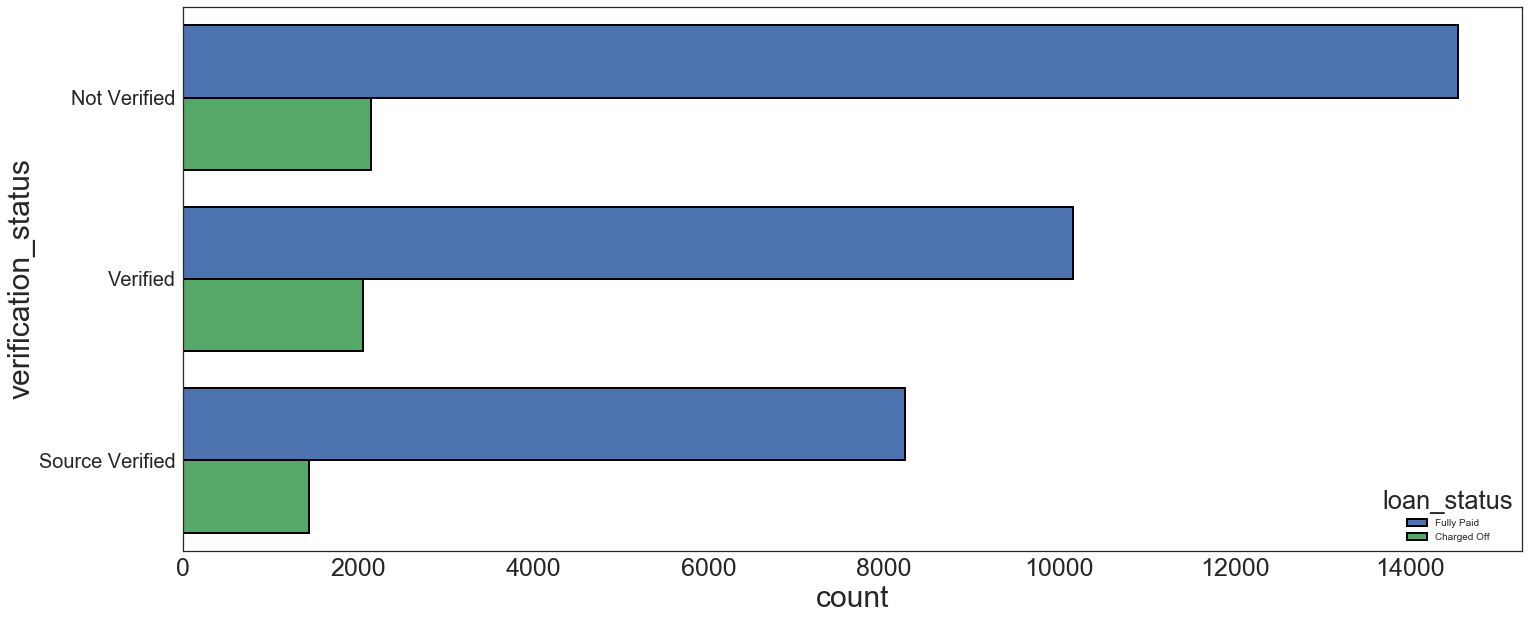

In [28]:
ver = df_c1[['verification_status','loan_status']]
sns.set_style("white")
sns.set_context({"figure.figsize": (24, 10)})
sns.countplot(y="verification_status", hue="loan_status", saturation=1,edgecolor=(0,0,0),linewidth=2,data=ver,order=ver.verification_status.value_counts().iloc[:4].index)
plt.show()

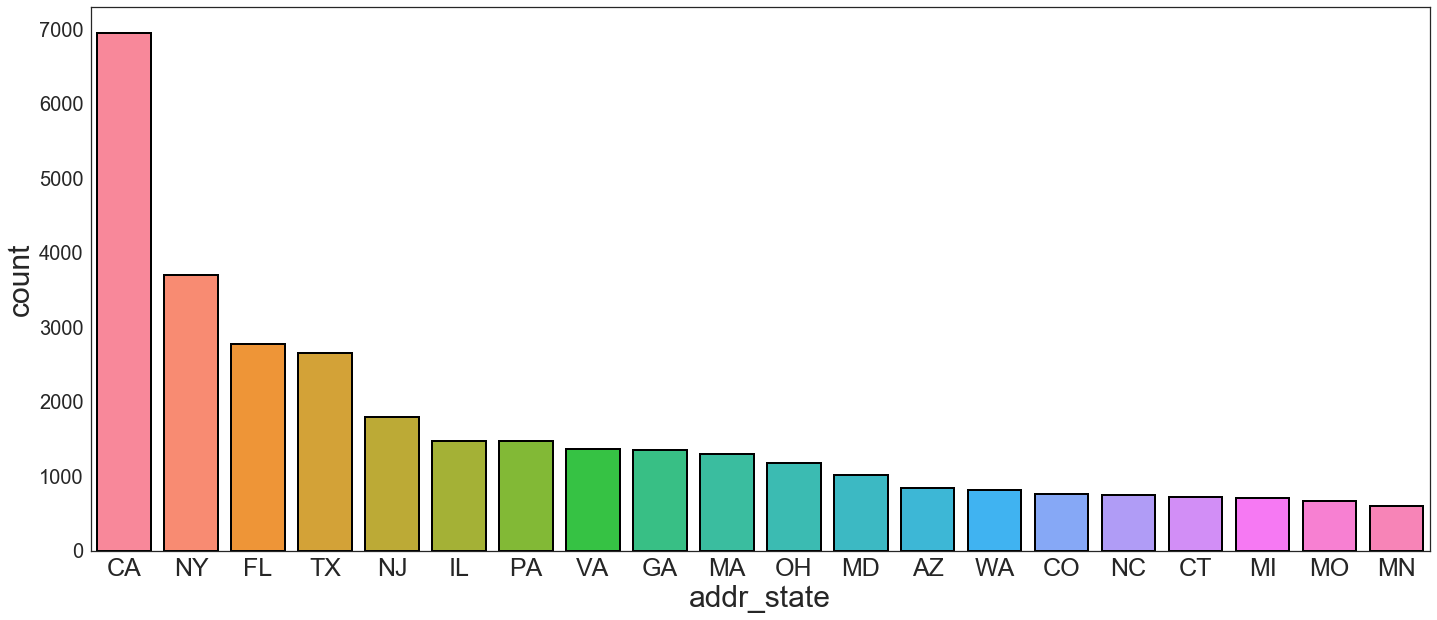

In [29]:
g = sns.countplot(x='addr_state',saturation=1,edgecolor=(0,0,0),linewidth=2,data=df_c1,order=df_c1.addr_state.value_counts().iloc[:20].index)
plt.show()

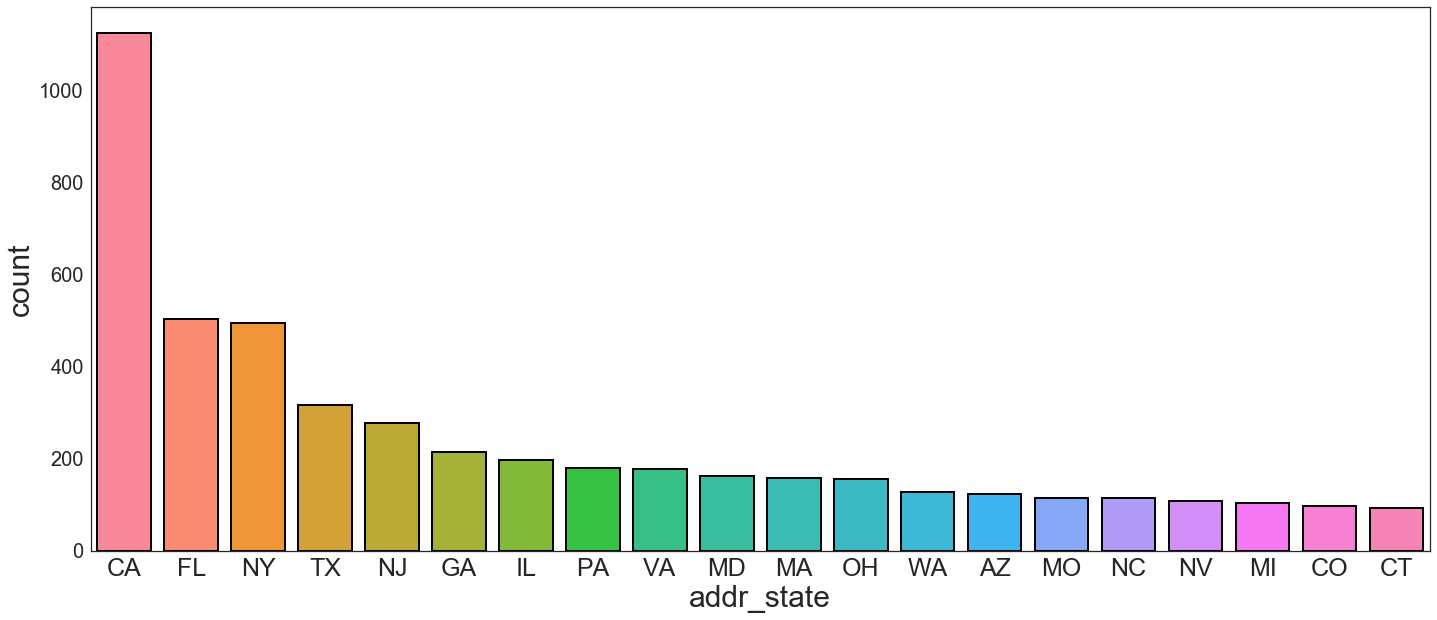

In [30]:
Add_c = Add[Add.loan_status == "Charged Off"]
g = sns.countplot(x='addr_state',saturation=1,edgecolor=(0,0,0),linewidth=2,data=Add_c,order=Add_c.addr_state.value_counts().iloc[:20].index)
plt.show()

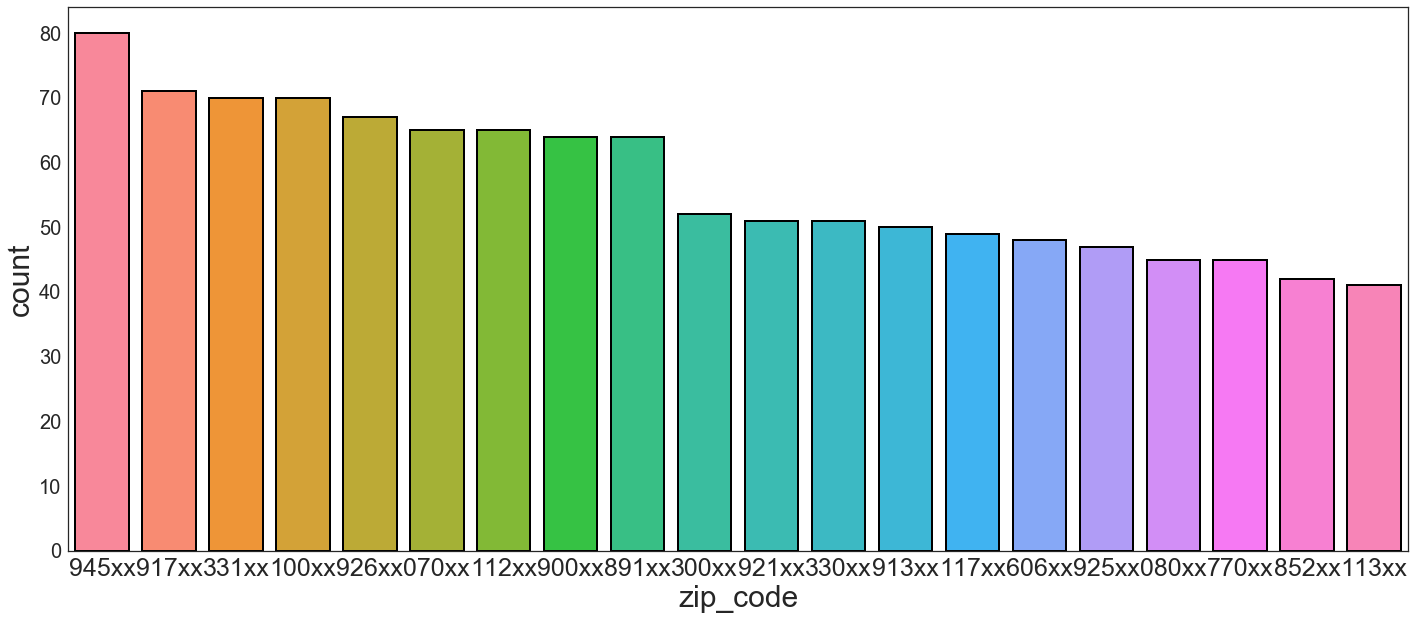

In [31]:
zip = df_c1[['zip_code','loan_status']]
zip.head()
zip_c = zip[zip.loan_status == "Charged Off"]
g = sns.countplot(x='zip_code',saturation=1,edgecolor=(0,0,0),linewidth=2,data=zip_c,order=zip_c.zip_code.value_counts().iloc[:20].index)
plt.show()

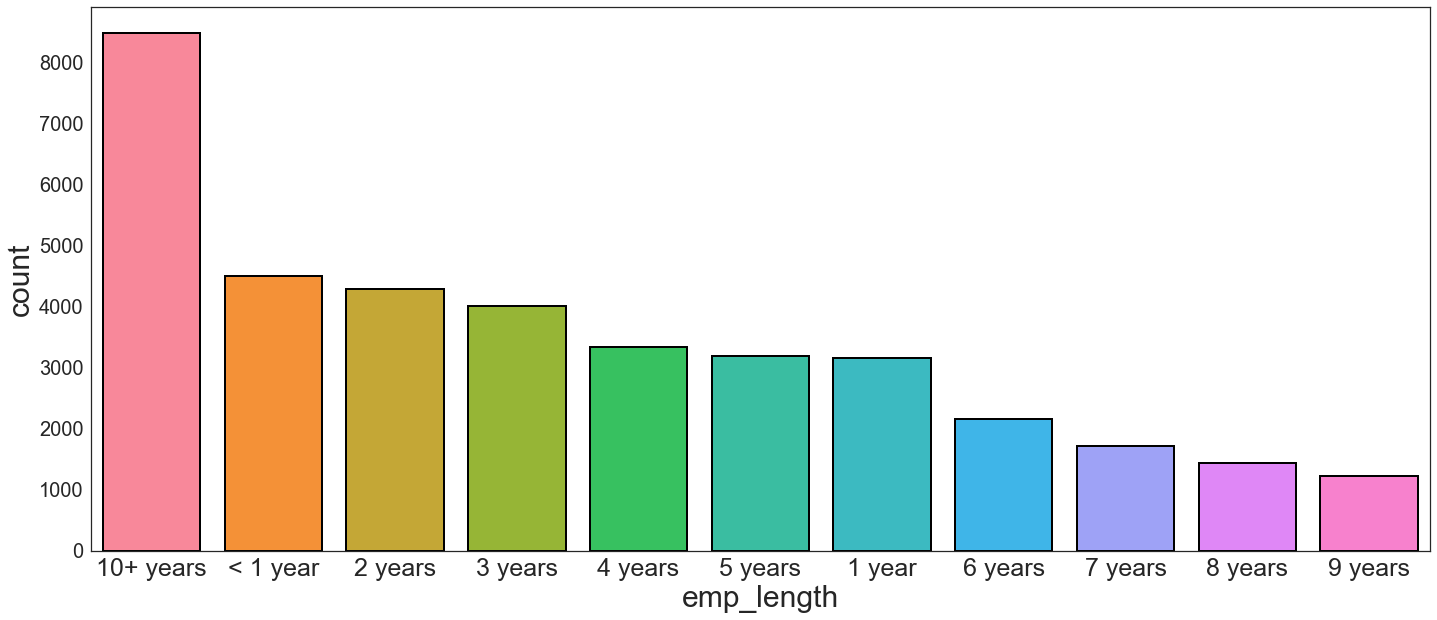

In [32]:
emp_l = df_c1[['emp_length','loan_status']]
empl_c = emp_l[emp_l.loan_status == "Charged Off"]
g = sns.countplot(x='emp_length',saturation=1,edgecolor=(0,0,0),linewidth=2,data=emp_l,order=emp_l.emp_length.value_counts().iloc[:20].index)
plt.show()

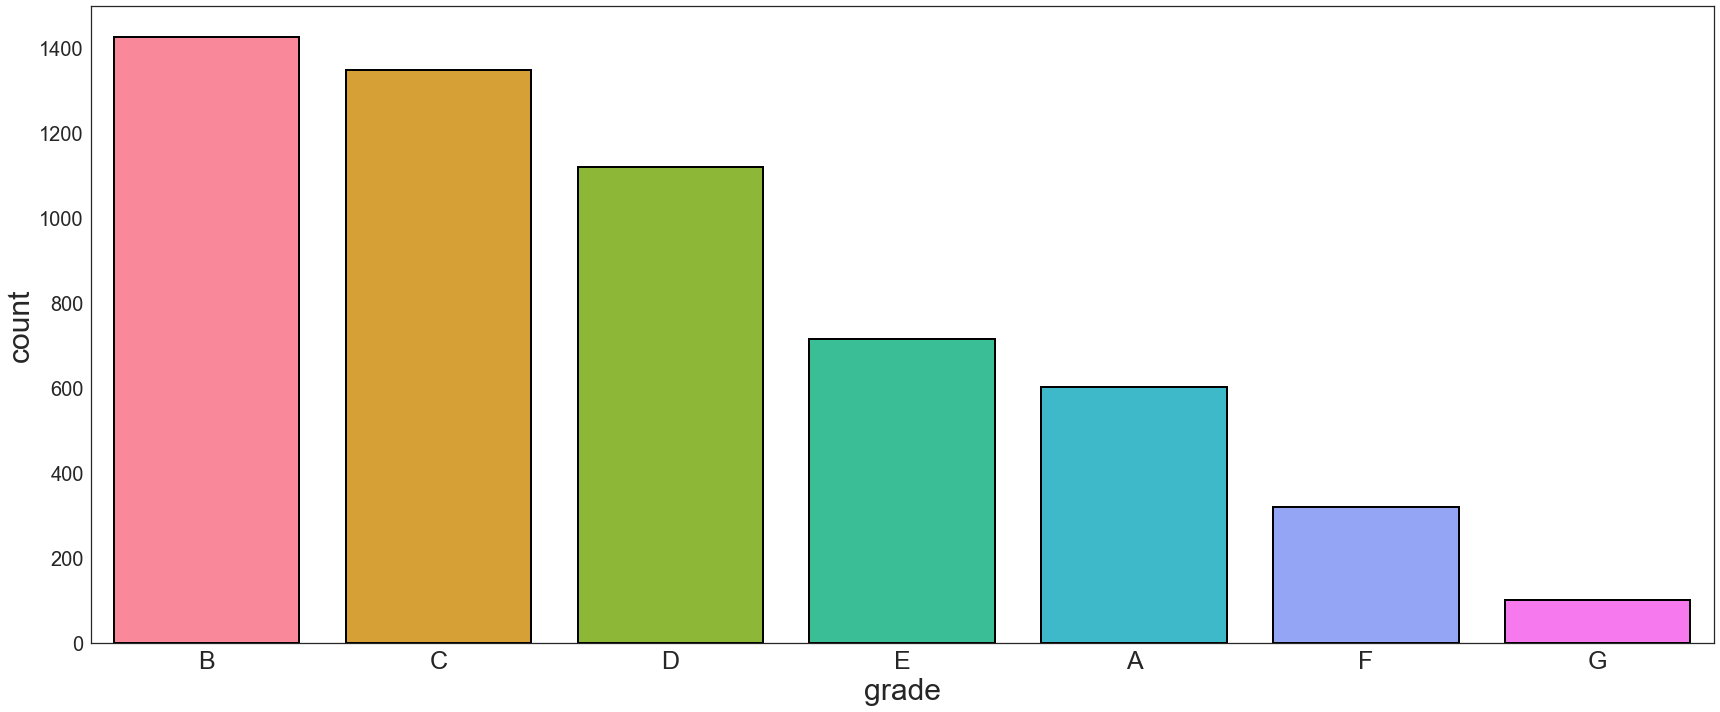

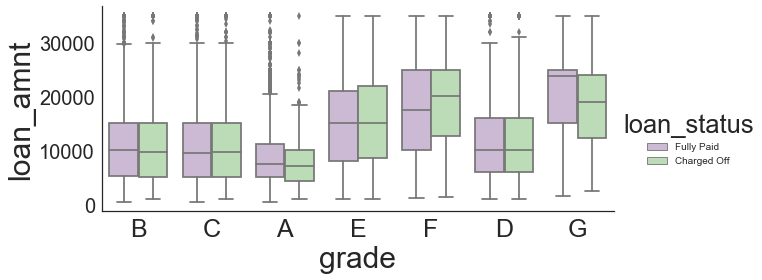

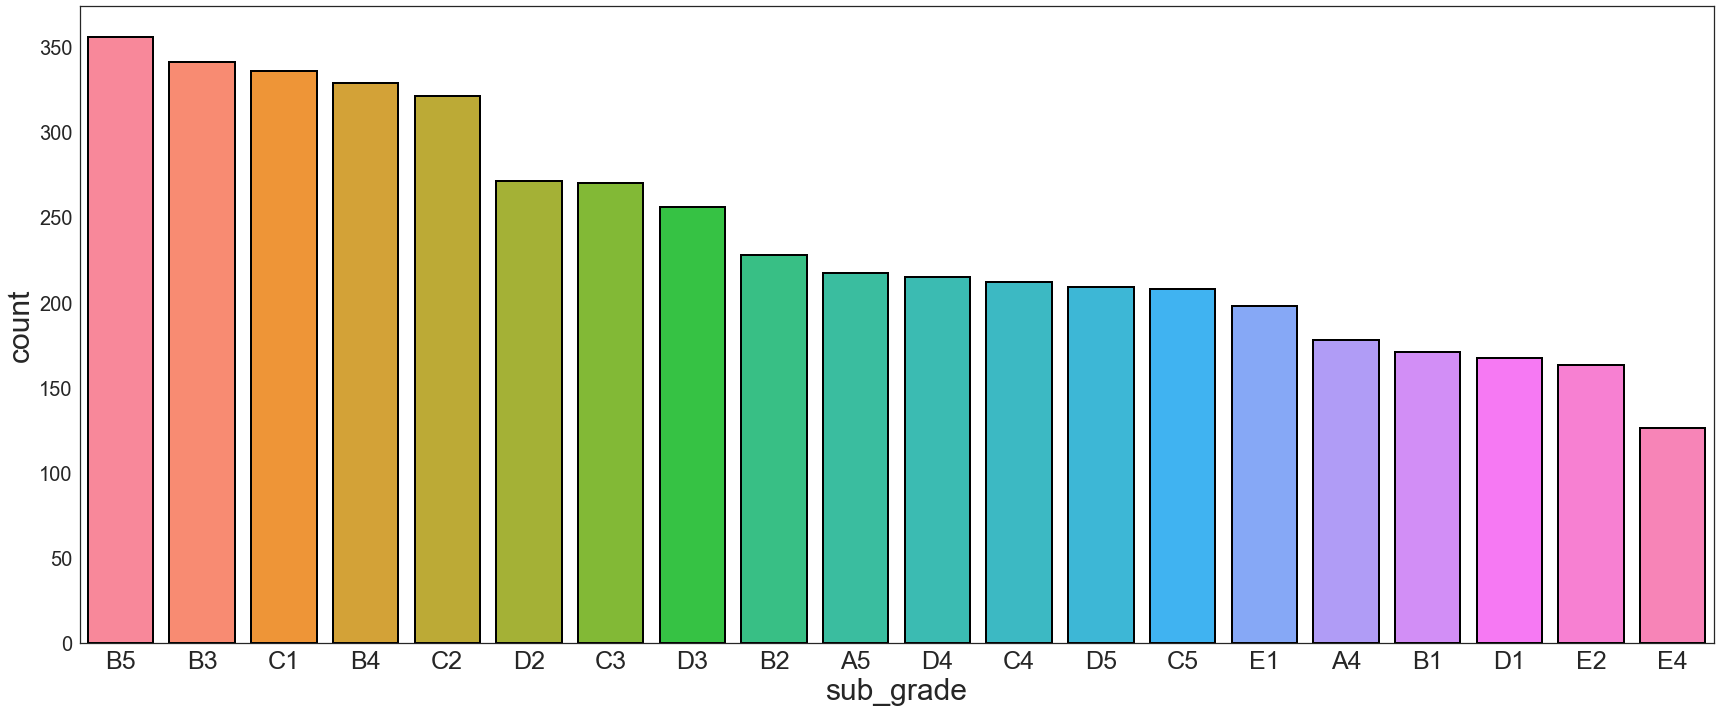

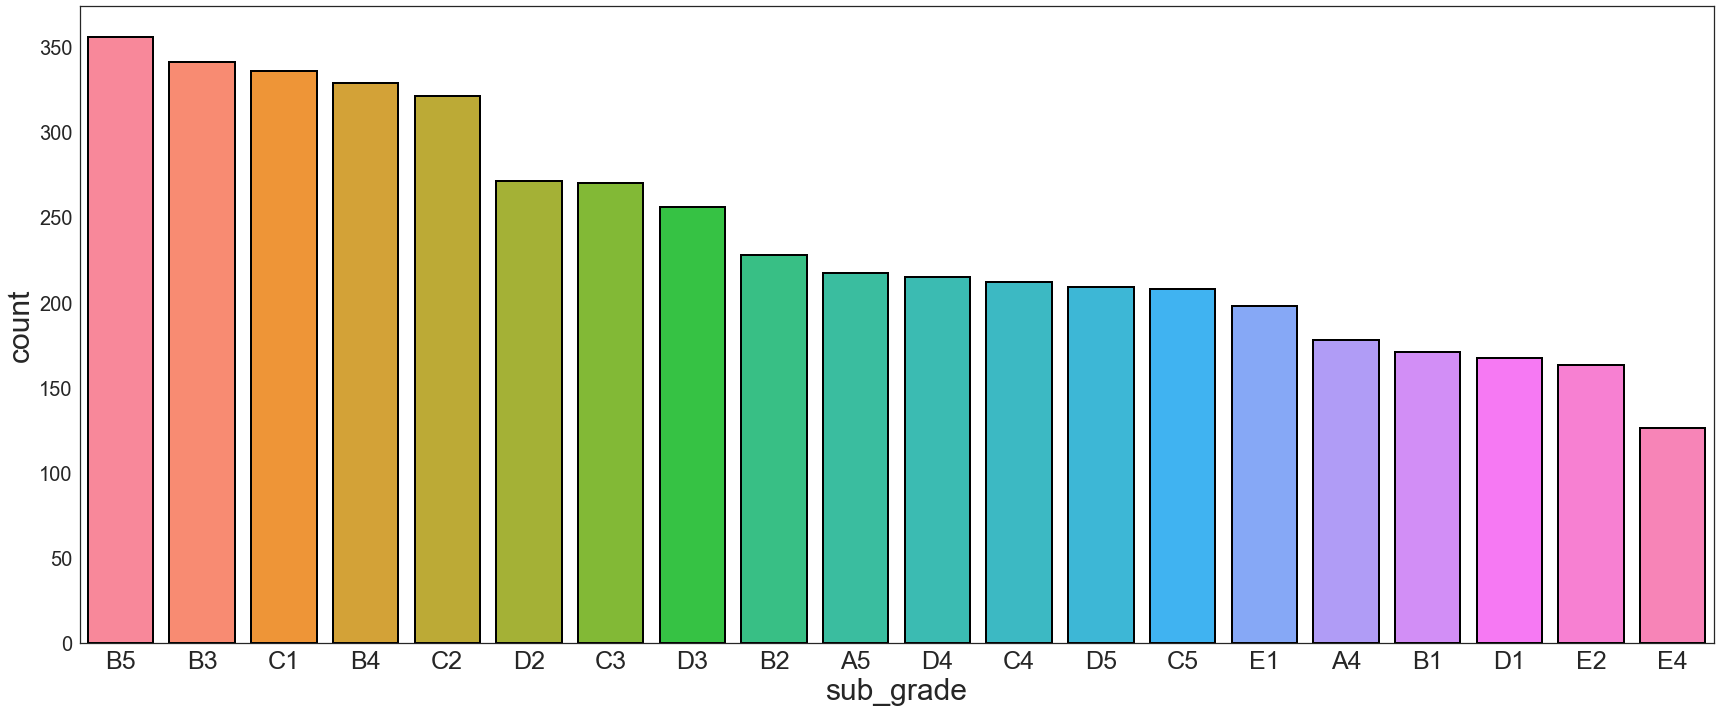

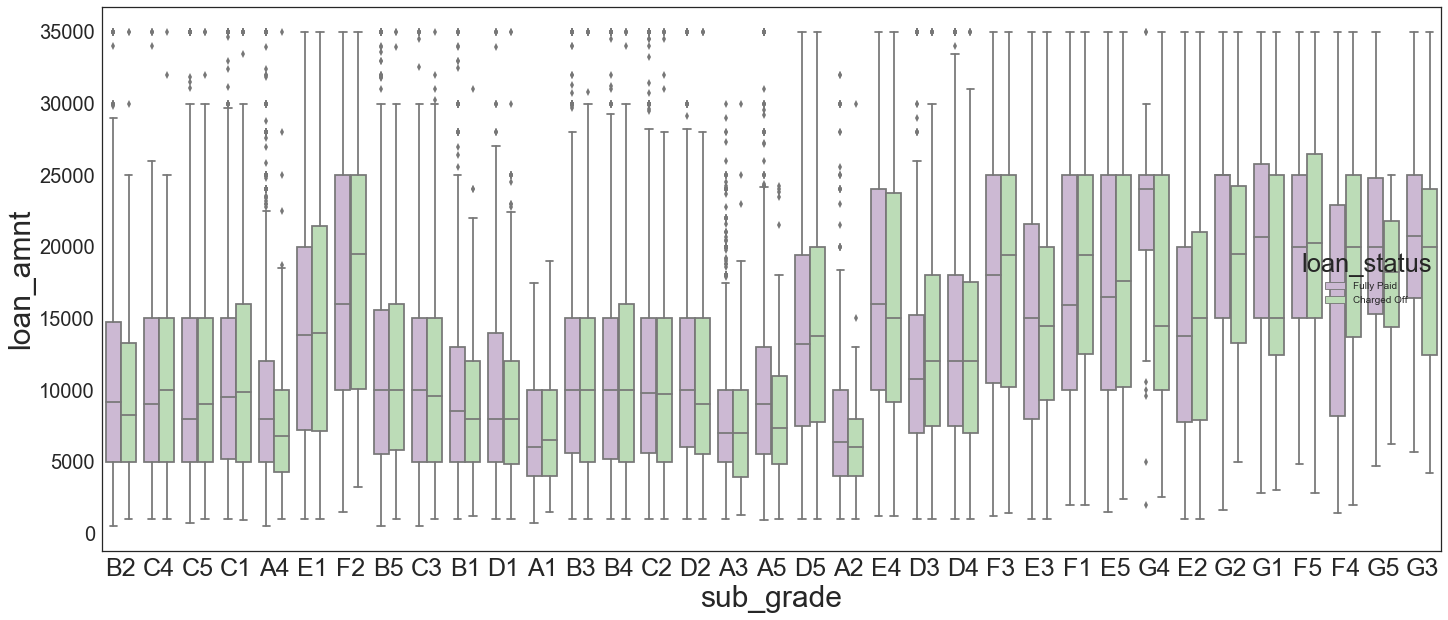

In [33]:
#sns.set_context('paper', font_scale=1.5)
grade = df_c1[['grade','loan_amnt','loan_status']]
grade_c = grade[grade.loan_status == "Charged Off"]
g = sns.countplot(x='grade',saturation=1,edgecolor=(0,0,0),linewidth=2,data=grade_c,order=grade_c.grade.value_counts().iloc[:20].index)
plt.tight_layout()
plt.show()
sns.set_style("white")
sns.set_context({"figure.figsize": (24, 10)})
g = sns.factorplot(x="grade", y="loan_amnt", hue="loan_status",data=grade, kind="box",size=4,palette="PRGn",aspect=2.25)
plt.show()

grade1 =df_c1[['sub_grade','grade','loan_amnt','loan_status']]
grade1_c = grade1[grade1.loan_status == "Charged Off"]
g = sns.countplot(x='sub_grade',saturation=1,edgecolor=(0,0,0),linewidth=2,data=grade1_c,order=grade1_c.sub_grade.value_counts().iloc[:20].index)
plt.tight_layout()
plt.show()
g = sns.countplot(x='sub_grade',saturation=1,edgecolor=(0,0,0),linewidth=2,data=grade1_c,order=grade1_c.sub_grade.value_counts().iloc[:20].index)
plt.tight_layout()
plt.show()

sns.set_style("white")
g = sns.boxplot(x="sub_grade", y="loan_amnt", hue="loan_status",data=grade1,palette="PRGn")
plt.show()

In [34]:
#Analysis of Anual Income

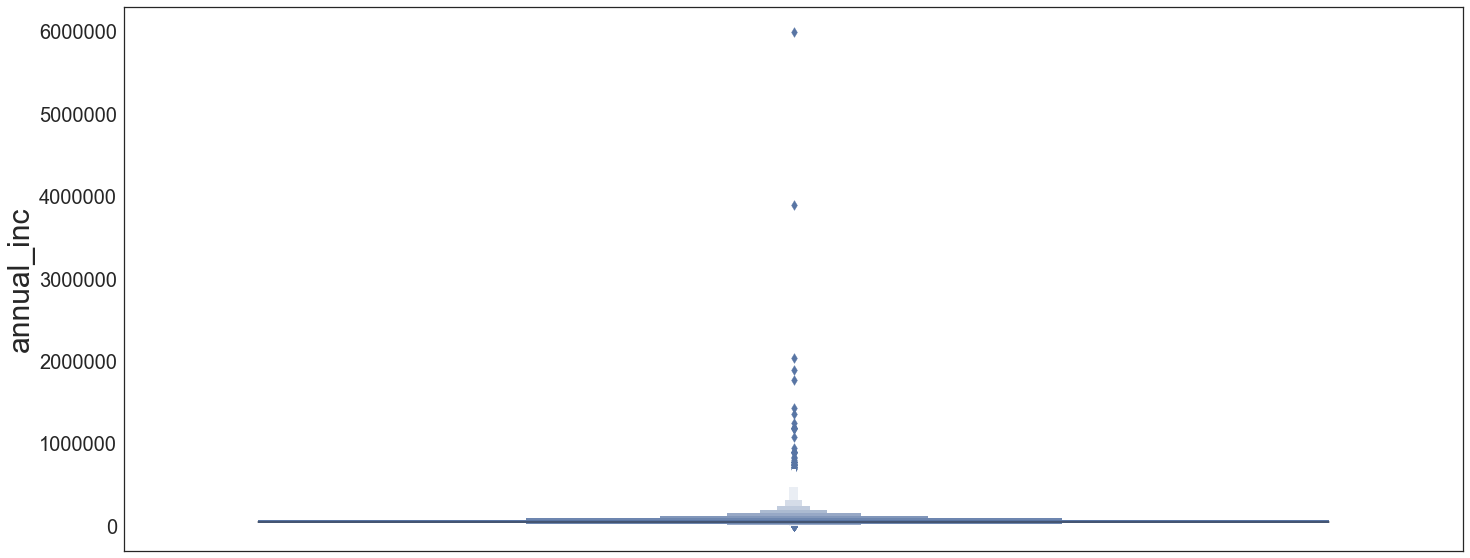

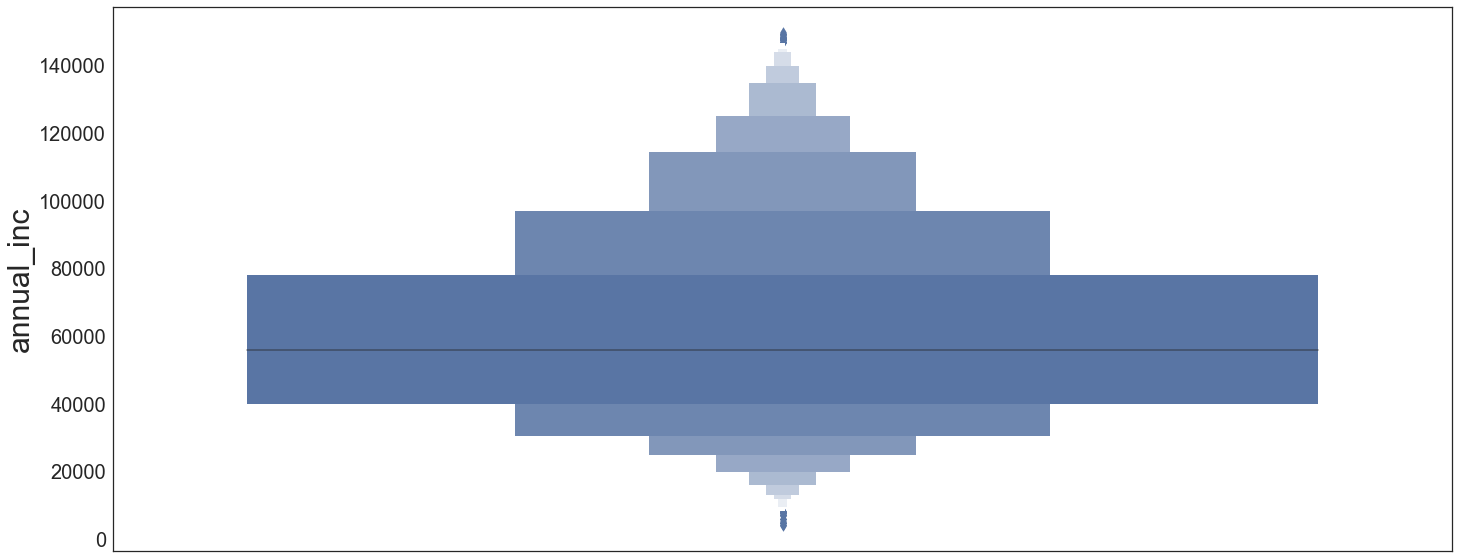

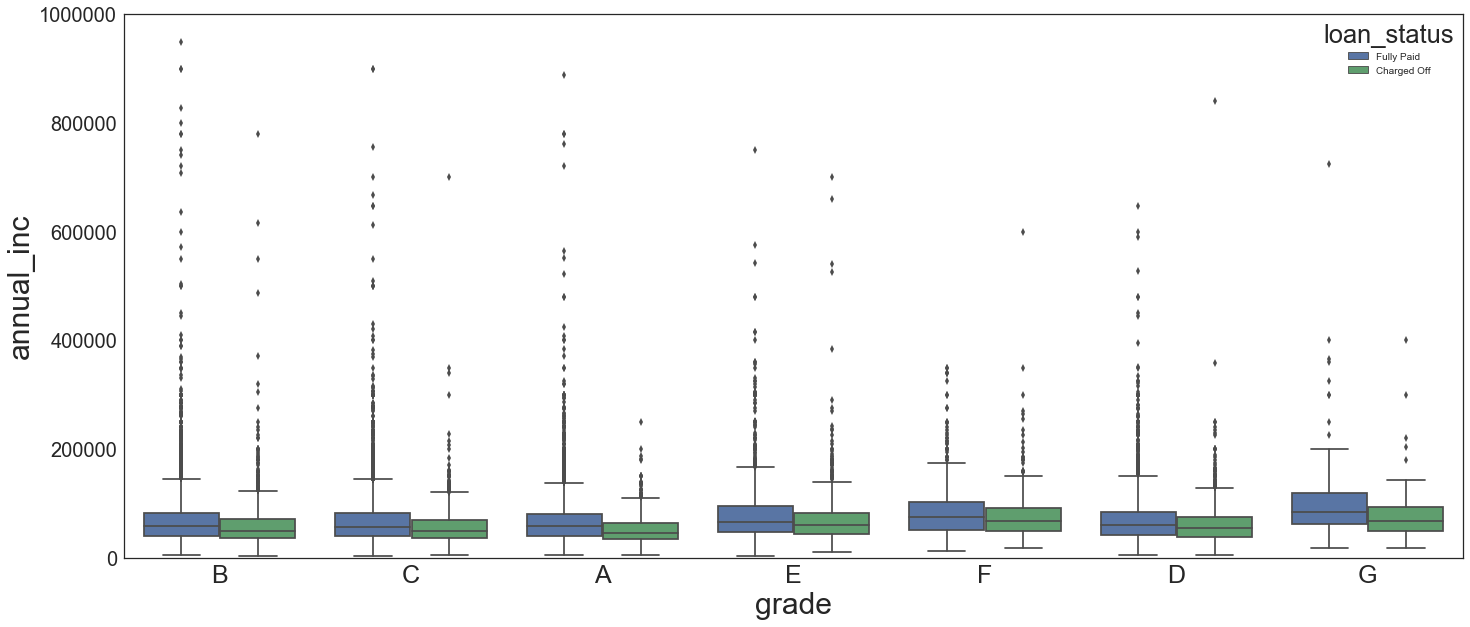

In [35]:
ax = sns.lvplot(y=df_c1["annual_inc"])
plt.show()
df2 = df_c1[df_c1["annual_inc"]< 150000]
ax = sns.lvplot(y=df2["annual_inc"])
plt.show()
AI = df_c1[['annual_inc','grade','loan_status']]
g=sns.boxplot(x='grade',y='annual_inc',hue='loan_status',data=AI)
plt.ylim(0, 1000000)
plt.show()

In [36]:
#Analysis of Collection Recovery fees

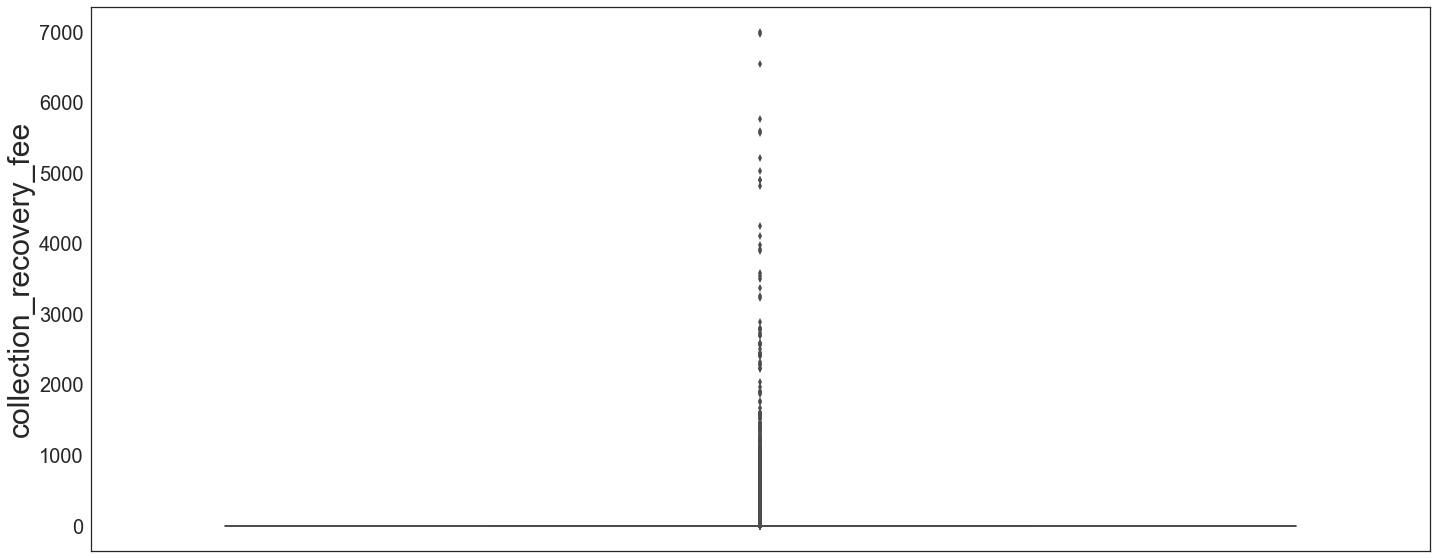

In [37]:
crf = df_c1[['collection_recovery_fee','loan_status']]
crf.dropna(inplace=True)
g = sns.boxplot(y='collection_recovery_fee',hue='loan_status',data=crf)
plt.show()

In [38]:
# Analysis of DTI

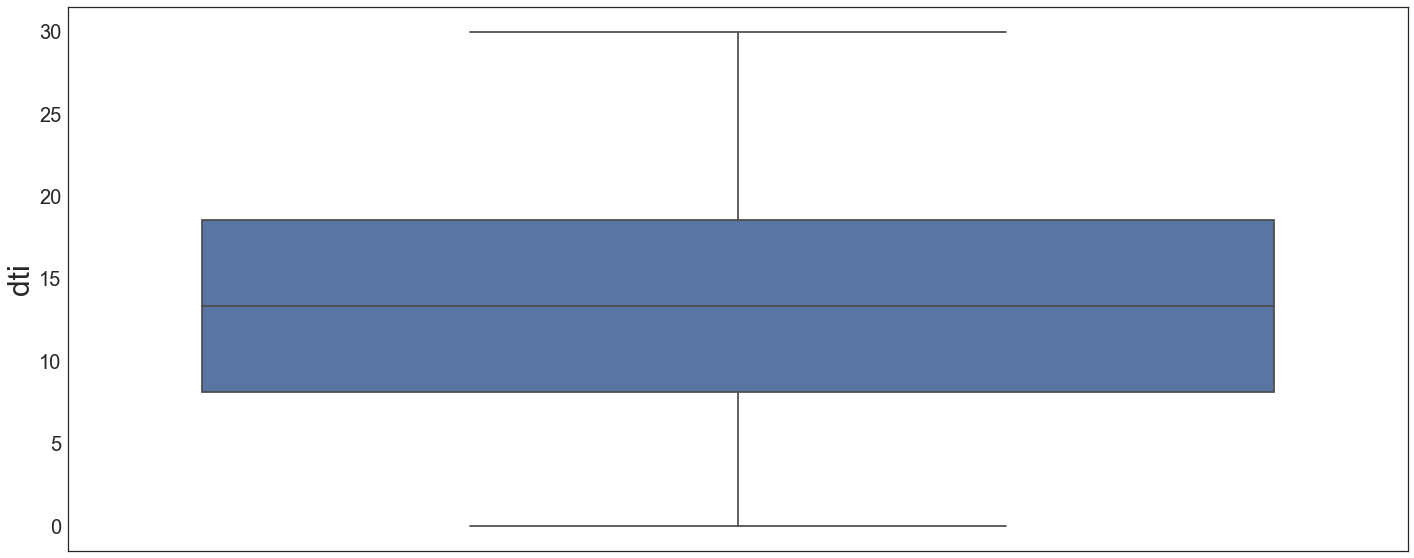

In [39]:
g = sns.boxplot(y='dti',hue='loan_status',data=df_c1)
plt.show()

In [40]:
#Funded Amount

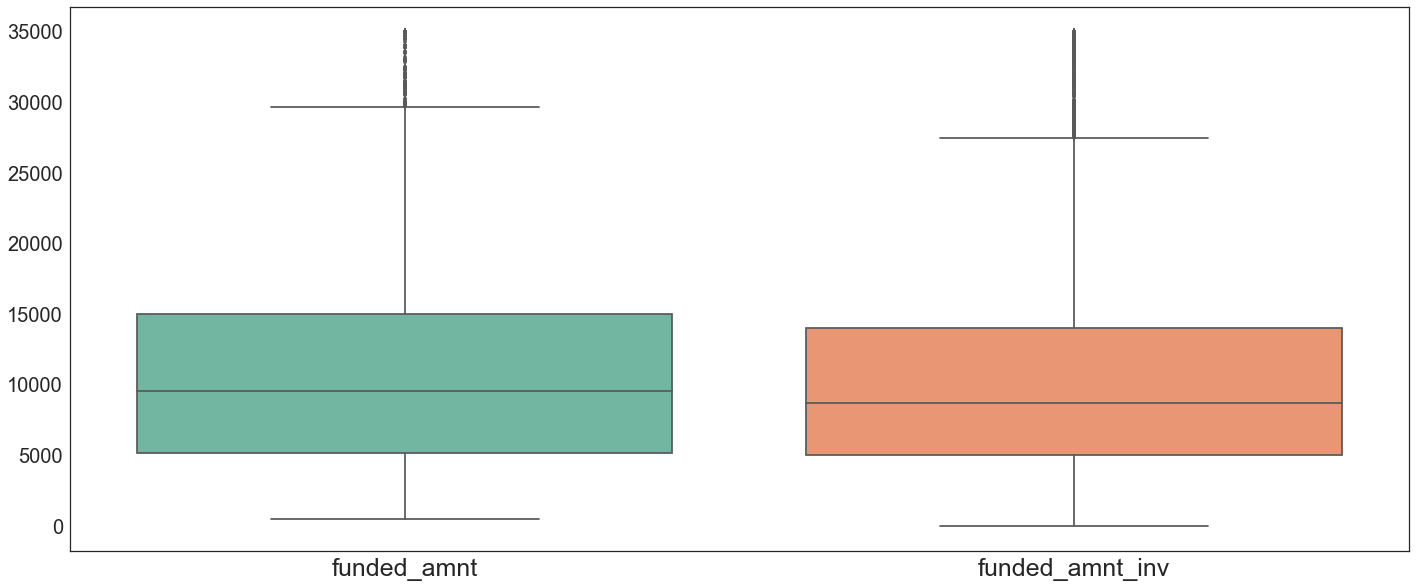

In [41]:
data = df_c1[['funded_amnt','funded_amnt_inv']]
ax = sns.boxplot(data=data,palette="Set2")
plt.show()

In [42]:
#Analysis of no of enquires in six months

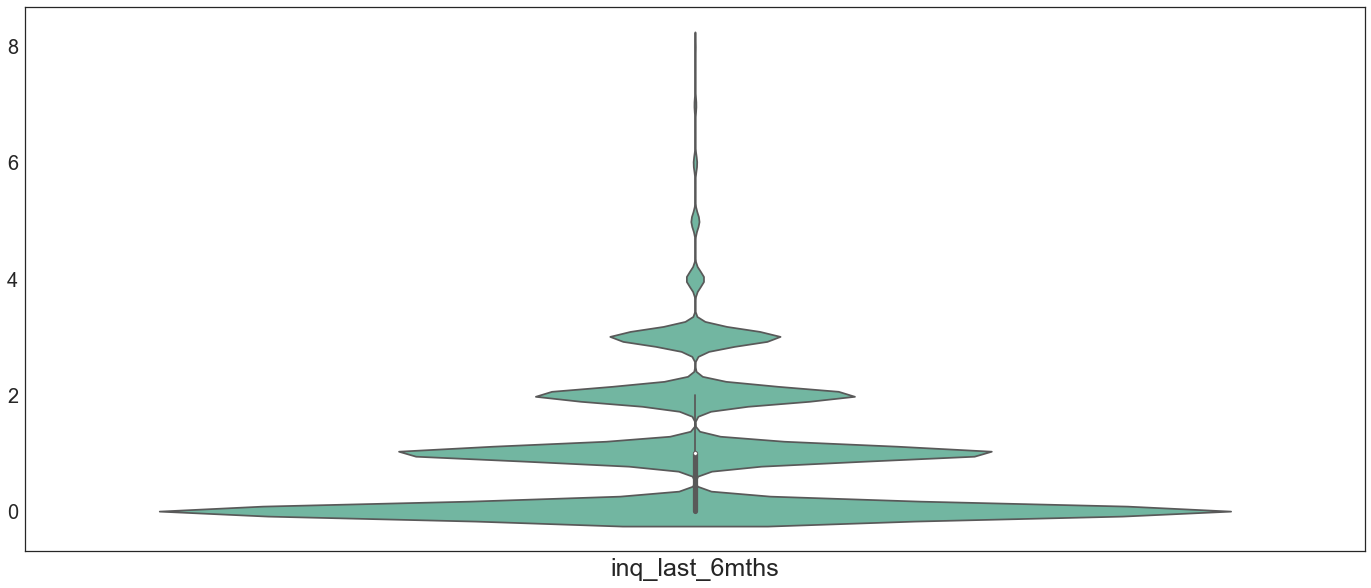

In [43]:
#inq_last_12m
data = df_c1[['inq_last_6mths']]
ax = sns.violinplot(data=data,palette="Set2")
plt.show()

In [44]:
#Observations: From the plots, it appears that there are too many 0 values

In [45]:
#Analysis of Installments

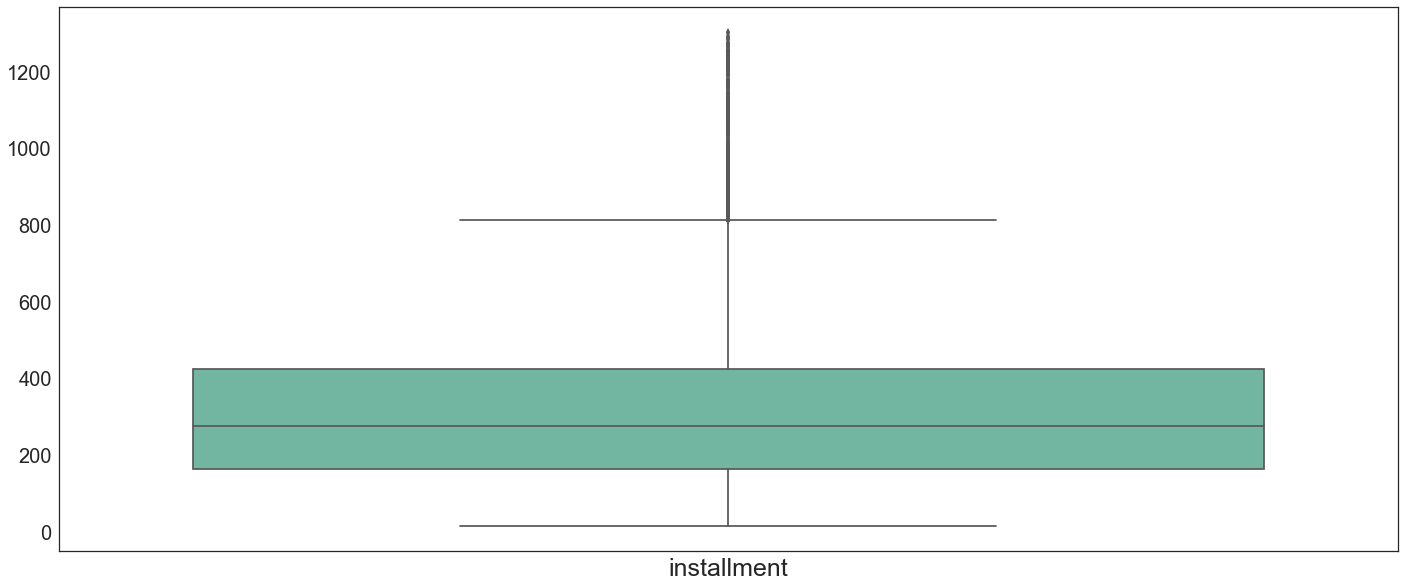

In [46]:
data = df_c1[['installment']]
ax = sns.boxplot(data=data,palette="Set2")
plt.show()

In [47]:
#Observation: Lot of outliers in installment

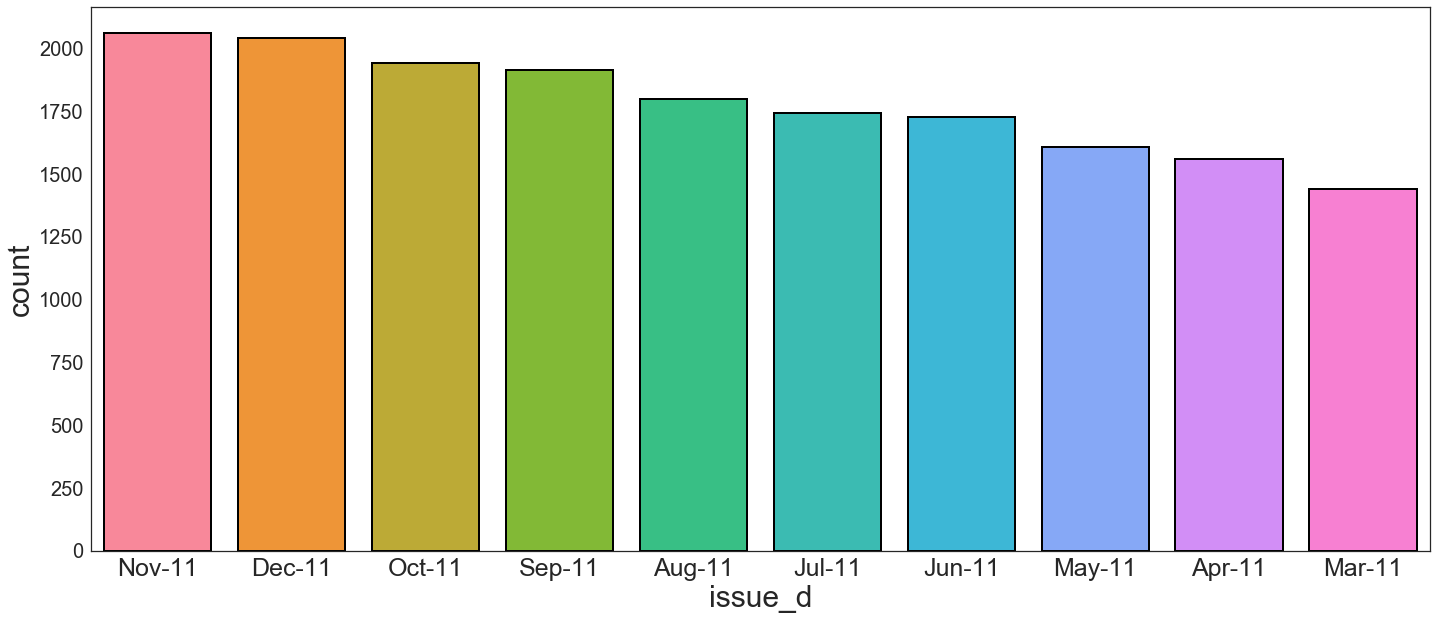

In [48]:
data = df_c1[['issue_d']]
g = sns.countplot(x='issue_d',saturation=1,edgecolor=(0,0,0),linewidth=2,data=data,order=data.issue_d.value_counts().iloc[:10].index)
plt.show()

In [49]:
#Observations: There is an increasing trend in the no. of issued loans every month

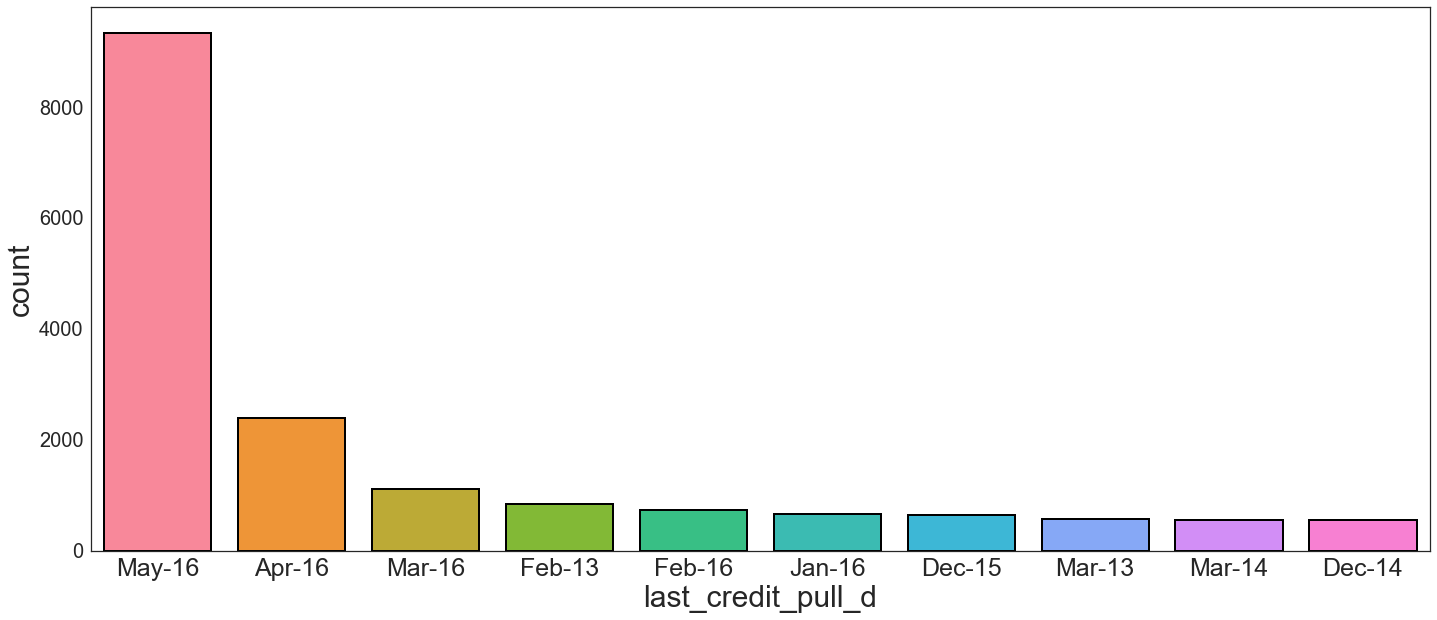

In [50]:
data = df_c1[['last_credit_pull_d']]
g = sns.countplot(x='last_credit_pull_d',saturation=1,edgecolor=(0,0,0),linewidth=2,data=data,order=data.last_credit_pull_d.value_counts().iloc[:10].index)
plt.show()

In [51]:
#Observations: There is an increasing trend in the no. of credit pulls in may 2016

In [52]:
#Analysis of Last Payment Amount

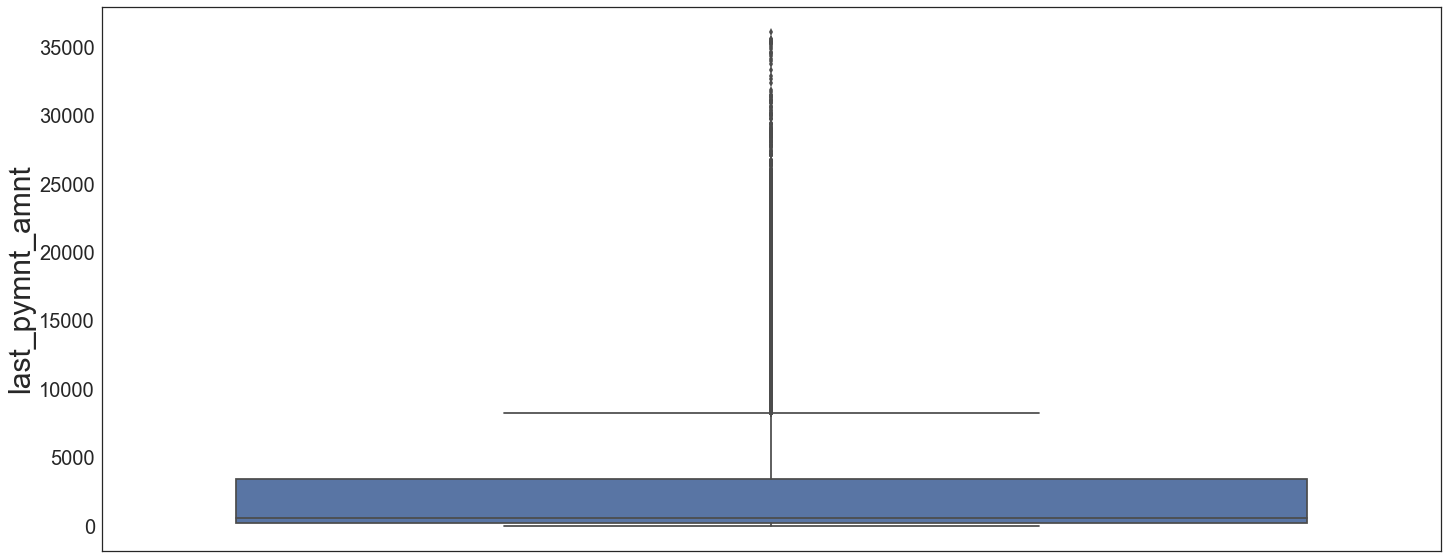

In [53]:
data = df_c1[['last_pymnt_amnt']]
g = sns.boxplot(y='last_pymnt_amnt',data=data)
plt.show()

In [54]:
#Observation: Lot of outliers in the upper end of the distribution

In [55]:
#Analysis of Loan amount

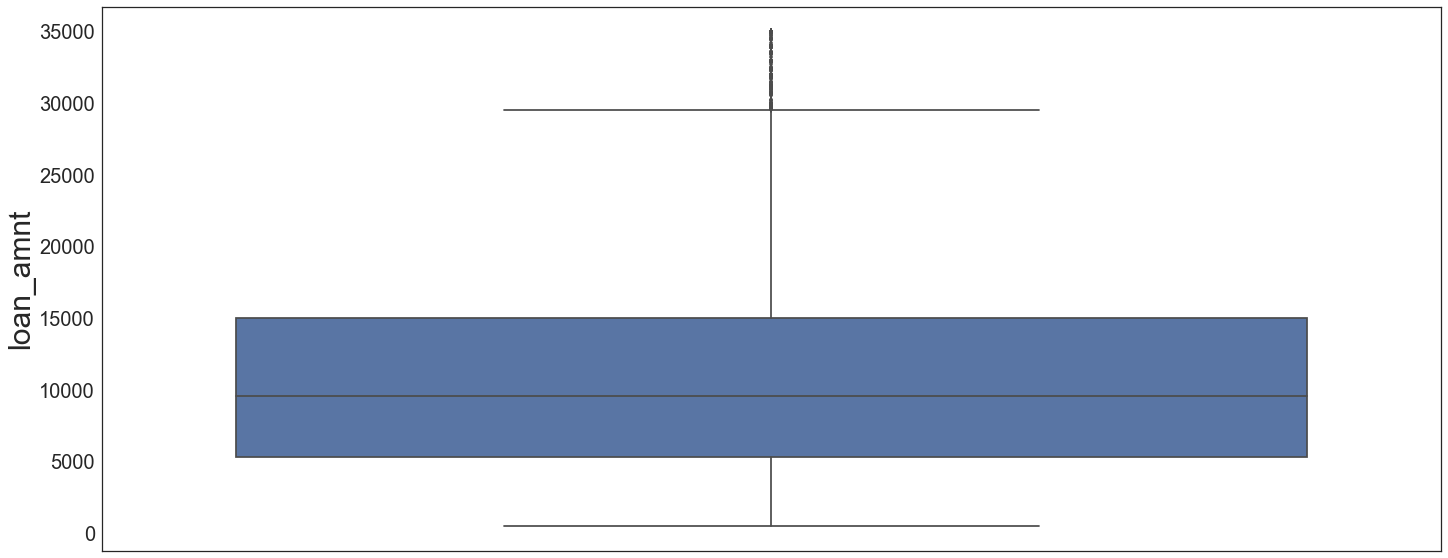

In [56]:
data = df_c1[['loan_amnt','loan_status']]
g = sns.boxplot(y="loan_amnt",data=data)
plt.show()

In [57]:
#Observations: From the box plot outliers at the far end. We could remove these using the 95% variance rule.

In [58]:
#Analysis of open Accounts

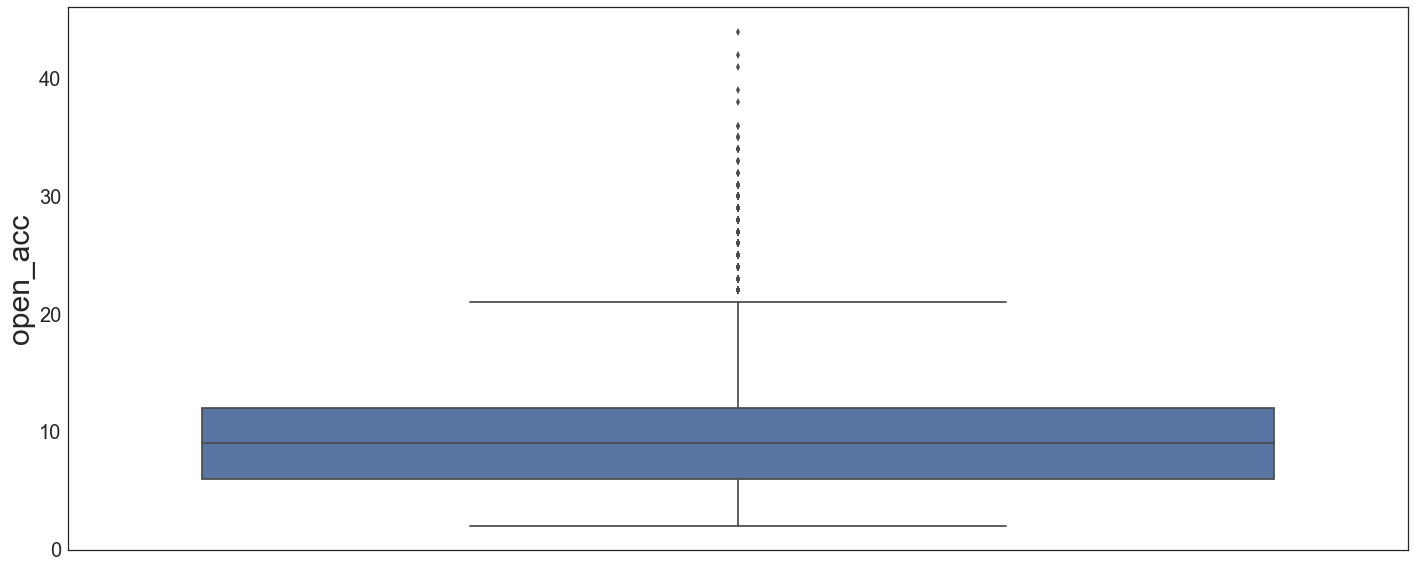

In [59]:
data = df_c1[['open_acc']]
g = sns.boxplot(y="open_acc",data=data)
plt.show()

In [60]:
#Observations: From the box plot we can see there are some outliers at the top

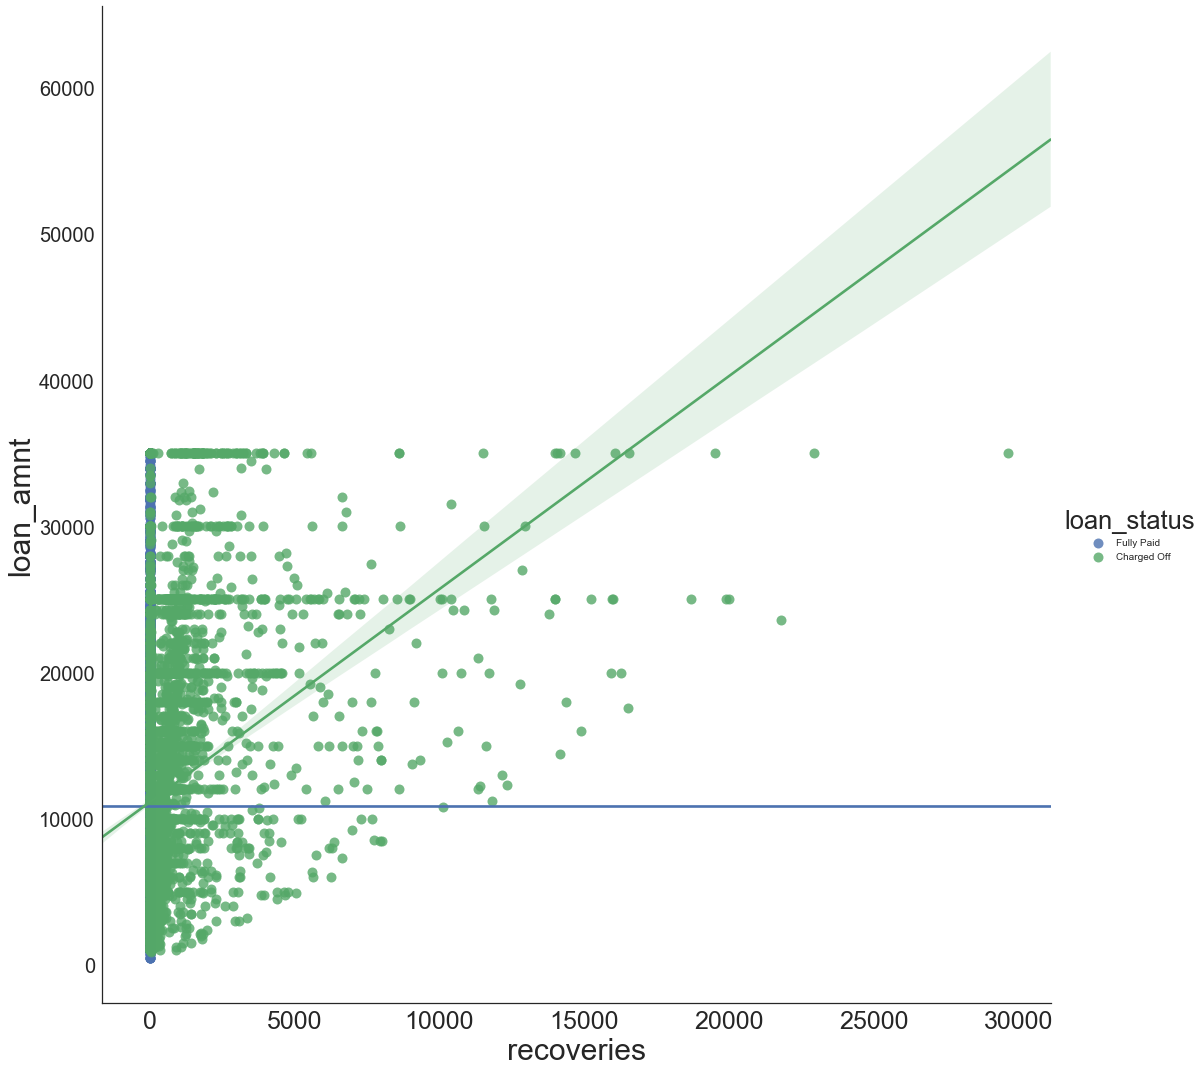

In [61]:
data = df_c1[['recoveries','loan_amnt','loan_status']]
data.head()
sns.set_style("white")
sns.set_context({"figure.figsize": (24, 10)})
sns.lmplot('recoveries', # Horizontal axis
           'loan_amnt', # Vertical axis
           data=data, # Data source
           size=15,
           fit_reg=True, # Don't fix a regression line
           hue="loan_status", # Set color
           scatter_kws={"marker": ['o','x'], # Set marker style
                        "s": 100})
plt.show()

In [62]:
#observation : The number of recoveries are higher in charged off condition. 

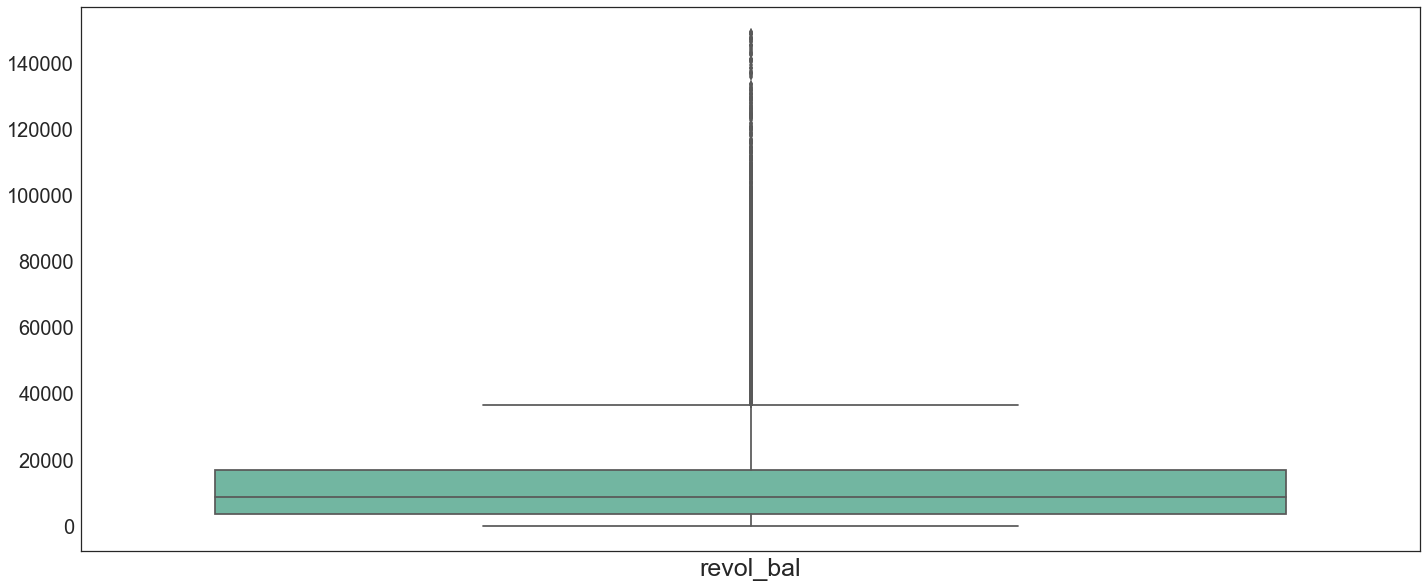

In [63]:
data = df_c1[['revol_bal']]
ax = sns.boxplot(data=data,palette="Set2")
plt.show()

In [64]:
data = df_c1[['revol_util']]
data.head()

,revol_util
0,83.70%
1,9.40%
2,98.50%
3,21%
5,28.30%


In [65]:
#Analysis of Total number of credit lines

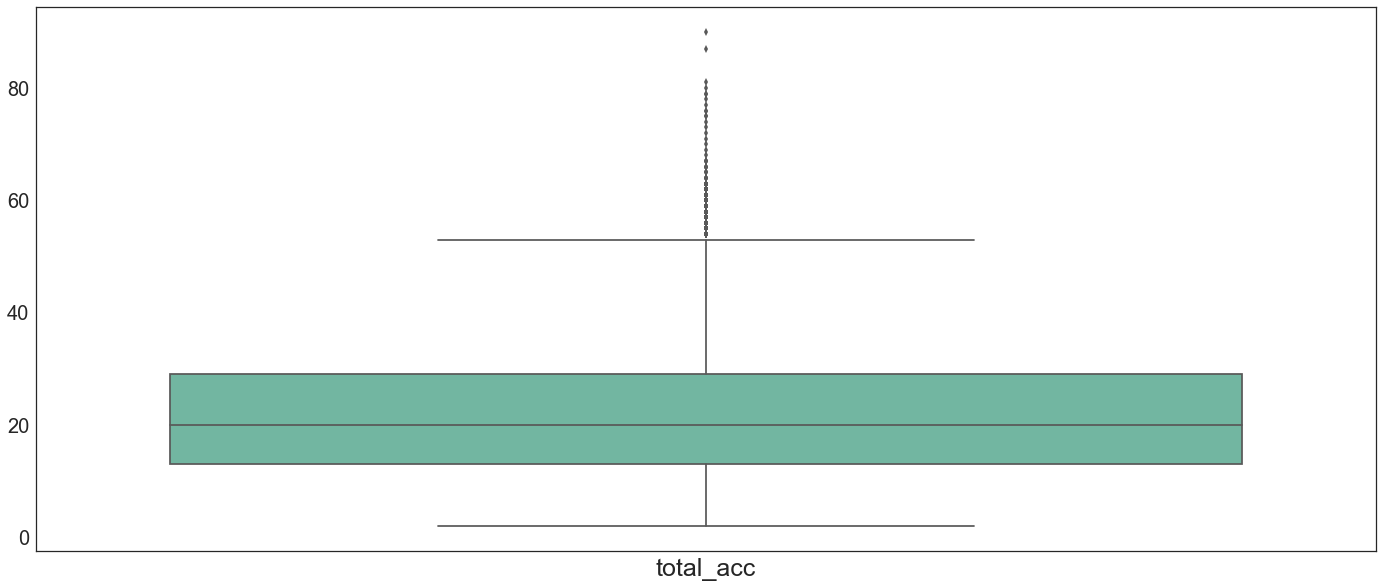

In [66]:
data = df_c1[['total_acc']]
ax = sns.boxplot(data=data,palette="Set2")
plt.show()

In [67]:
#Observations: From the box plot for Total open credit lines, it appears that there are a considerable number of outliers

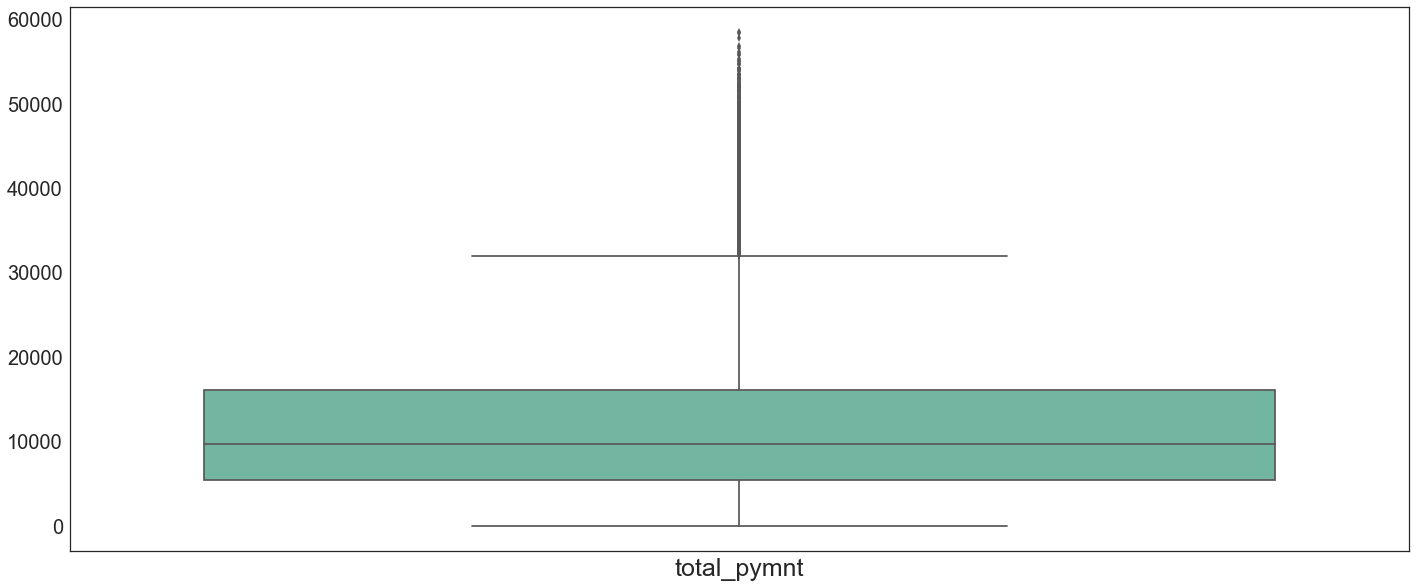

In [68]:
data = df_c1[['total_pymnt']]
ax = sns.boxplot(data=data,palette="Set2")
plt.show()

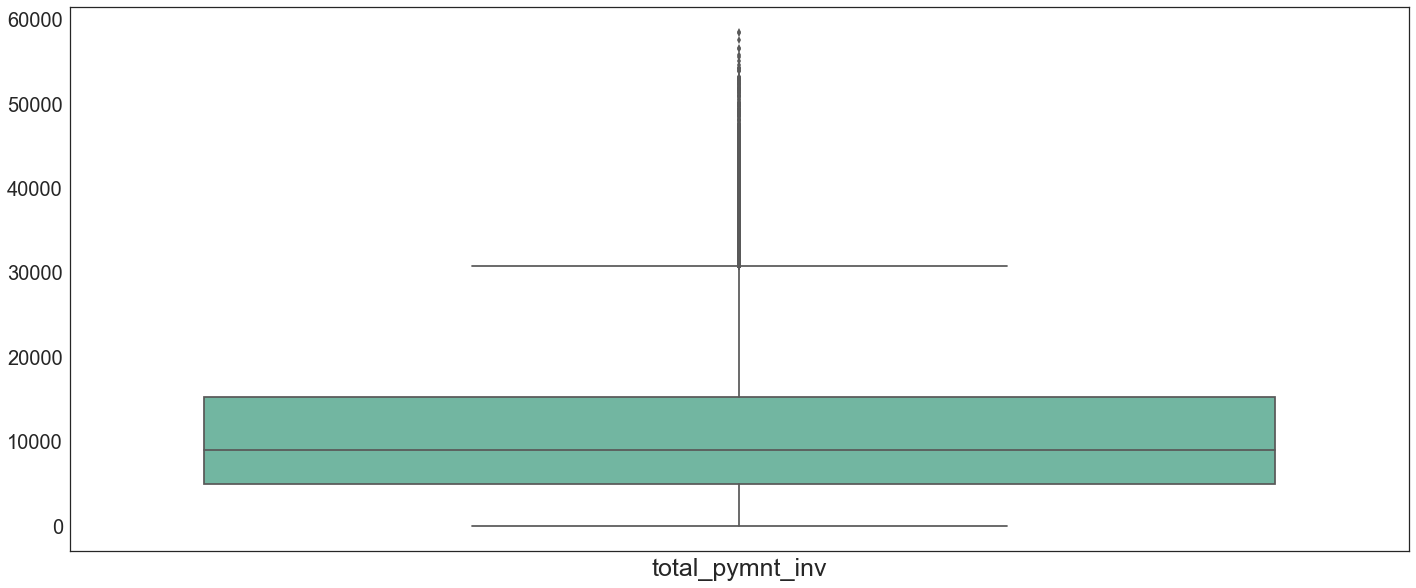

In [69]:
data = df_c1[['total_pymnt_inv']]
ax = sns.boxplot(data=data,palette="Set2")
plt.show()

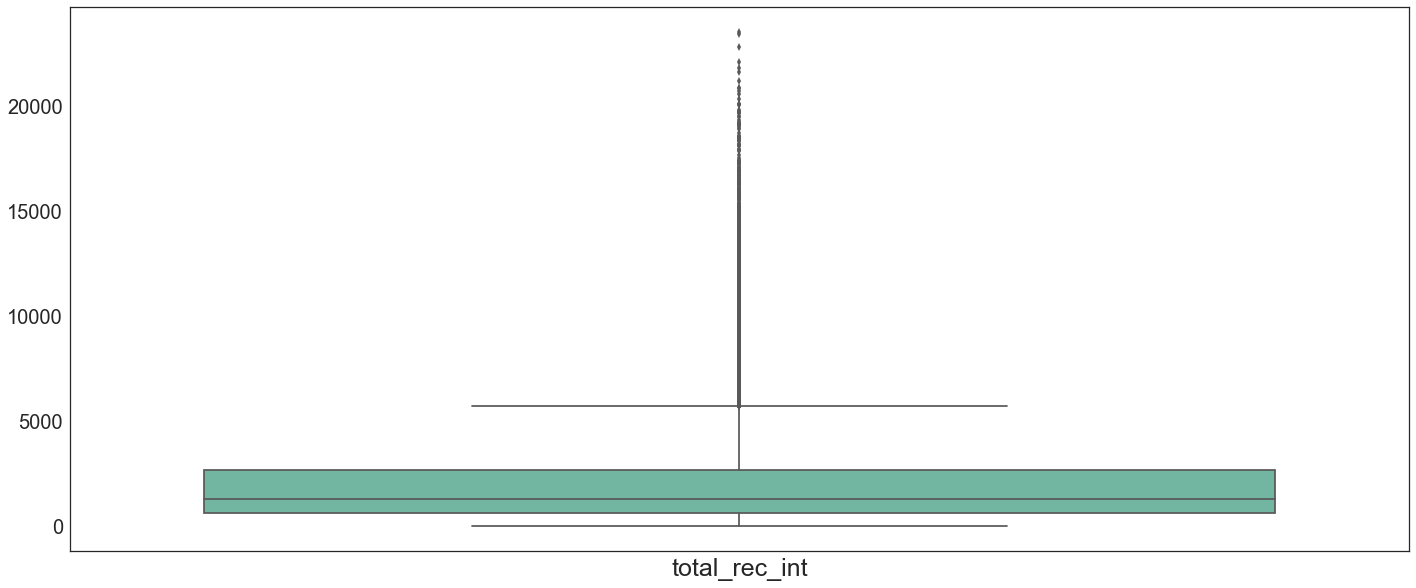

In [70]:
data = df_c1[['total_rec_int']]
ax = sns.boxplot(data=data,palette="Set2")
plt.show()

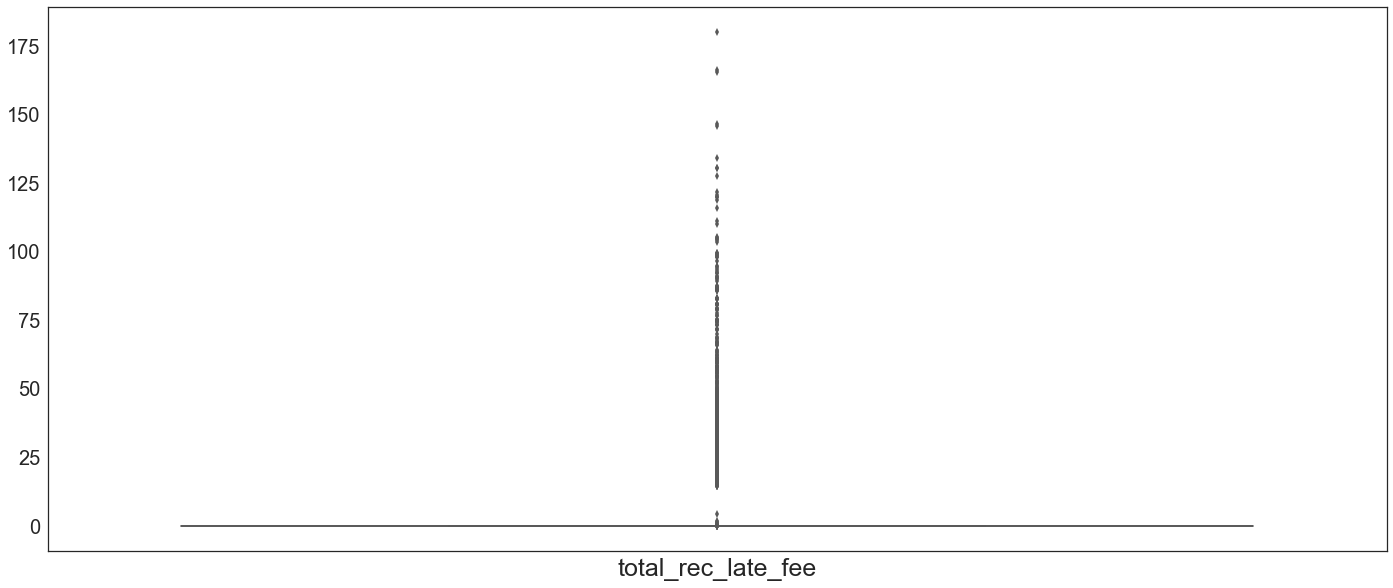

In [71]:
data = df_c1[['total_rec_late_fee']]
ax = sns.boxplot(data=data,palette="Set2")
plt.show()

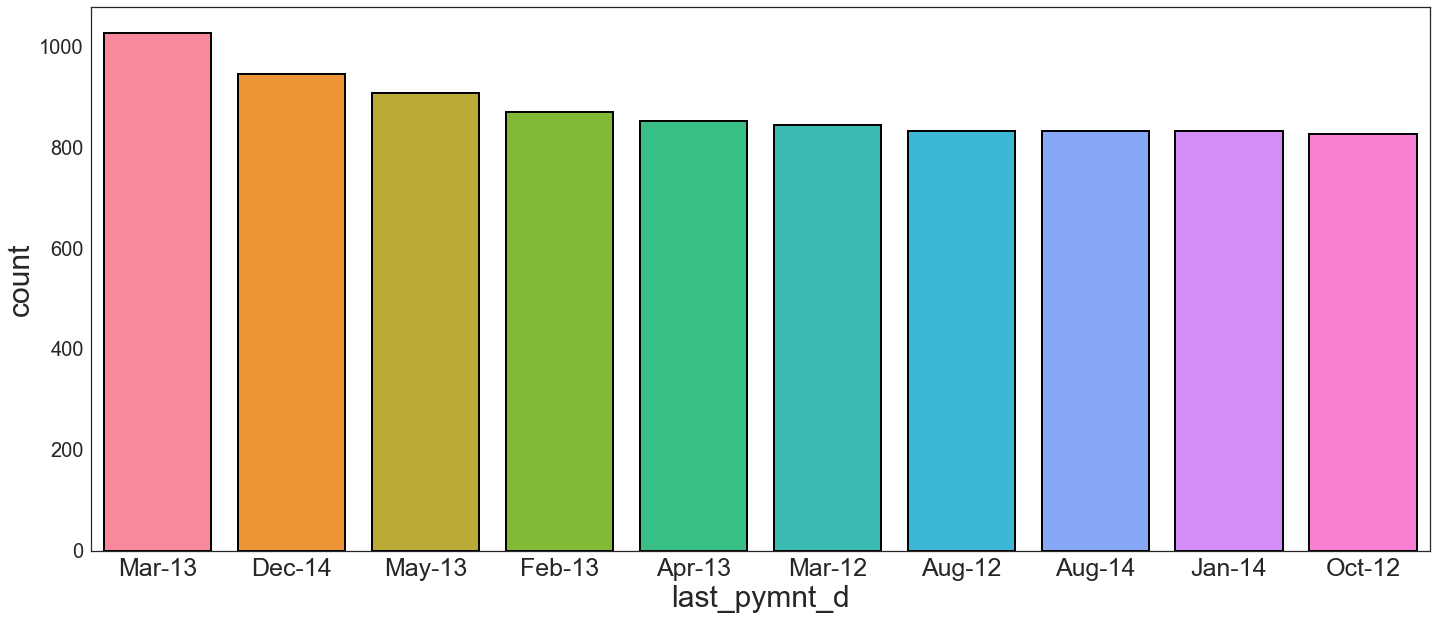

In [72]:
data = df_c1[['last_pymnt_d']]
g = sns.countplot(x='last_pymnt_d',saturation=1,edgecolor=(0,0,0),linewidth=2,data=data,order=data.last_pymnt_d.value_counts().iloc[:10].index)
plt.show()

In [73]:
#Observations: Last Payment Dates were high at March 2013, after that they seem to dwindle